# Credit EDA Case Study

### Introduction 
This assignment gives an idea of how to apply EDA in real business scenario and also helps to develop a basic understanding of risk analytics in banking and financial services, how to use data to reduce the losses.

### Business understanding: 
Because of insufficient or non-existent credit history, the loan providing companies find it difficult to approve loans. Some customers take advantage by becoming defaulter as a result loan providing companies face losses. So EDA is used to analyse the patterns present in the data and ensures that customers capable of loan repayment are not rejected.
When loan application is received by a company/bank, two types of risks are associated with the decision made by bank:
        1. Applicant likely to repay loan- application rejected- loss of business.
        2. Applicant not likely to repay loan- application approved- loss of business.
        
        
The data given contains two scenarios:

        1.The client with payment difficulties
        2.All other cases

When a client applies for a loan: four types of decisions could be taken:

                                1.Approved
                                2.Cancelled
                                3.Refused
                                4.Unused offer

### Business Objectives
The case study aims to identify patterns which indicate if a client has difficulty paying loan which may be used for taking actions like Approving the loan, rejecting the loan etc. This will ensure that the consumers capable of loan repayment are not rejected.

This dataset has 3 files as explained below:

1. 'application_data.csv': contains all the information of the client at the time of application. The data is about whether a client has payment difficulties.

2. 'previous_application.csv':  contains information about the client’s previous loan data. It contains the data whether the previous application had been Approved, Cancelled, Refused or Unused offer.

3. 'columns_description.csv':  is data dictionary which describes the meaning of the variables.

### Filtering Out Warnings

In [1]:
# Import warnings
import warnings
warnings.filterwarnings('ignore')

### Importing All Necessary Libraries

In [2]:
# Import important Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Displaying Maximum Rows And Columns

In [3]:
pd.set_option('display.max_columns',600)
pd.set_option('display.max_rows', 600)

### Loading The Data 

#### application_data

In [4]:
# Loading data
app_data = pd.read_csv(r'F:\Credit EDA Case Study\application_data.csv')
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
# Checking the shape of the dataframe
app_data.shape

(307511, 122)

### Data Handling And Cleaning

#### Checking Duplicates

In [6]:
# checking duplicates
app_data.duplicated().sum()

0

No duplicates are present in the data

#### Information About The Datatypes Of All Variables To Find Incorrect Datatypes Or Handling The Correct Datatypes

Data Types: Multiple types of data types are available in the dataset.

    Example: Numerical Data (like int64 , float64 types) and Categorical (object types)
    
In Data given:

               Numerical Data: TARGET, CNT_CHILDREN, ETC
               Categorical Data: NAME_CONTRACT_TYPE, CODE_GENDER, ETC

In [7]:
# Checking the datatypes of all the variables in the dataframe
# app_data.info(verbose=True)
# app_data.dtypes
app_data.info(-1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

Note: The datatypes of all variables look fine no changes are required

#### Missing Values Treatment

From Lectures:
    Set values as missing values: identify values that indicate missing data. Ex: 'NA','XX','999',etc
    Adding is good, exaggerating is bad.
    Delete rows and columns
    Fill partial missing values.
    
Types of missing values: MCAR,MAR,MNAR

##### Missing Values

In [8]:
# checking the number of null values in the columns
app_data.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [9]:
# checking the percentage of null values in the columns
null_percentage = 100*app_data.isnull().sum()/len(app_data)
round(null_percentage,2).sort_values()

SK_ID_CURR                       0.00
HOUR_APPR_PROCESS_START          0.00
REG_REGION_NOT_WORK_REGION       0.00
LIVE_REGION_NOT_WORK_REGION      0.00
REG_CITY_NOT_LIVE_CITY           0.00
REG_CITY_NOT_WORK_CITY           0.00
LIVE_CITY_NOT_WORK_CITY          0.00
ORGANIZATION_TYPE                0.00
FLAG_DOCUMENT_21                 0.00
FLAG_DOCUMENT_20                 0.00
FLAG_DOCUMENT_19                 0.00
FLAG_DOCUMENT_18                 0.00
FLAG_DOCUMENT_17                 0.00
FLAG_DOCUMENT_16                 0.00
WEEKDAY_APPR_PROCESS_START       0.00
FLAG_DOCUMENT_15                 0.00
FLAG_DOCUMENT_13                 0.00
FLAG_DOCUMENT_12                 0.00
FLAG_DOCUMENT_11                 0.00
FLAG_DOCUMENT_10                 0.00
FLAG_DOCUMENT_9                  0.00
FLAG_DOCUMENT_8                  0.00
FLAG_DOCUMENT_7                  0.00
FLAG_DOCUMENT_6                  0.00
FLAG_DOCUMENT_5                  0.00
FLAG_DOCUMENT_4                  0.00
FLAG_DOCUMEN

In [10]:
# creating a dropping list of null values with percentage 40
drop_temp= (100*app_data.isnull().sum()/len(app_data)).reset_index().rename(columns= {'index':'column_name',0:'% missing'})
drop_columns = list(drop_temp[drop_temp['% missing']>=40]['column_name'])
drop_columns

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'TOTALAREA_MOD

In [11]:
# finding the length of the drop_columns
len(drop_columns)

49

##### Dropping The Missing Values

In [12]:
# Droping the null values having percentage more than 40
app_data = app_data.drop(drop_columns,axis=1)

In [13]:
# checking the shape of app_data dataframe
app_data.shape

(307511, 73)

In [14]:
# Categorical variables in app_data
app_data.select_dtypes(include='object').columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object')

In [15]:
# Number of Categorical Variables in app_data
len(app_data.select_dtypes(include='object').columns)

12

In [16]:
# checking the percentage of null values again after dropping columns
100*app_data.isnull().sum()/len(app_data)

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

##### Imputing Missing values 

For Numerical column use: mean(), median()

For Categorical Column use: mode()

#### percentage of null values between 0 and 1

In [17]:
# percentage of null values between 0 and 1
null_values_between_1_and_0 = null_percentage[(null_percentage<=1)& (null_percentage>0)]
round(null_values_between_1_and_0,4)

AMT_ANNUITY                 0.0039
AMT_GOODS_PRICE             0.0904
NAME_TYPE_SUITE             0.4201
CNT_FAM_MEMBERS             0.0007
EXT_SOURCE_2                0.2146
OBS_30_CNT_SOCIAL_CIRCLE    0.3320
DEF_30_CNT_SOCIAL_CIRCLE    0.3320
OBS_60_CNT_SOCIAL_CIRCLE    0.3320
DEF_60_CNT_SOCIAL_CIRCLE    0.3320
DAYS_LAST_PHONE_CHANGE      0.0003
dtype: float64

In [18]:
# Check the most common value in the AMT_ANNUITY column i.e. mode
app_data['AMT_ANNUITY'].value_counts()

9000.0      6385
13500.0     5514
6750.0      2279
10125.0     2035
37800.0     1602
            ... 
79902.0        1
106969.5       1
60885.0        1
59661.0        1
77809.5        1
Name: AMT_ANNUITY, Length: 13672, dtype: int64

In [19]:
# Check the quantitative spread of the AMT_ANNUITY column gives mean and median
app_data['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

Outliers

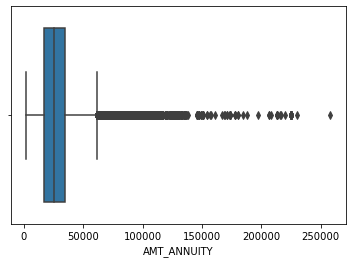

In [20]:
# Outliers
sns.boxplot(app_data.AMT_ANNUITY)
plt.show()

AMT_ANNUITY is a numerical column, hence a mean or a median is used to replace the null values. As this column contains outliers is better to use median to replace the null values.

In [21]:
# Check the most common value in the AMT_GOODS_PRICE column i.e. mode
app_data['AMT_GOODS_PRICE'].value_counts()

450000.0     26022
225000.0     25282
675000.0     24962
900000.0     15416
270000.0     11428
             ...  
1265751.0        1
503266.5         1
810778.5         1
666090.0         1
743863.5         1
Name: AMT_GOODS_PRICE, Length: 1002, dtype: int64

In [22]:
# Check the quantitative spread of the AMT_GOODS_PRICE column gives mean and median
app_data['AMT_GOODS_PRICE'].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

Outliers

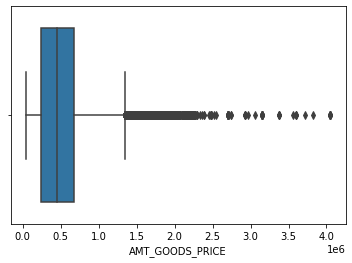

In [23]:
# Outliers
sns.boxplot(app_data.AMT_GOODS_PRICE)
plt.show()

AMT_GOODS_PRICE is a numerical column, hence a mean or a median is used to replace the null values.

In [24]:
# Check the most common value in the NAME_TYPE_SUITE column i.e. mode
app_data['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [25]:
# Check the quantitative spread of the NAME_TYPE_SUITE column gives mean and median
app_data['NAME_TYPE_SUITE'].describe()

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object

NAME_TYPE_SUITE is a Categorical column, hence mode is used to replace the null values.
Here mode is Unaccompanied

In [26]:
# Check the most common value in the CNT_FAM_MEMBERS column i.e mode
app_data['CNT_FAM_MEMBERS'].value_counts()

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [27]:
# Check the quantitative spread of the CNT_FAM_MEMBERS column gives mean and median
app_data['CNT_FAM_MEMBERS'].describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

Outliers

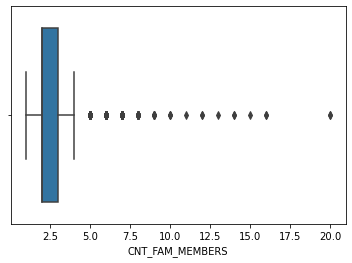

In [28]:
# Outliers
sns.boxplot(app_data.CNT_FAM_MEMBERS)
plt.show()

CNT_FAM_MEMBERS is a numerical column, hence a mean or a median can be used to replace the null values.

In [29]:
# Check the most common value in the EXT_SOURCE_2 column i.e. mode
app_data['EXT_SOURCE_2'].value_counts()

0.285898    721
0.262258    417
0.265256    343
0.159679    322
0.265312    306
           ... 
0.004725      1
0.257313      1
0.282030      1
0.181540      1
0.267834      1
Name: EXT_SOURCE_2, Length: 119831, dtype: int64

In [30]:
# Check the quantitative spread of the EXT_SOURCE_2 column gives mean and median
app_data['EXT_SOURCE_2'].describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

EXT_SOURCE_2 is a numerical column, hence a mean or a median can be used to replace the null values.

In [31]:
# Check the most common value in the OBS_30_CNT_SOCIAL_CIRCLE column i.e mode
app_data['OBS_30_CNT_SOCIAL_CIRCLE'].value_counts()

0.0      163910
1.0       48783
2.0       29808
3.0       20322
4.0       14143
5.0        9553
6.0        6453
7.0        4390
8.0        2967
9.0        2003
10.0       1376
11.0        852
12.0        652
13.0        411
14.0        258
15.0        166
16.0        133
17.0         88
18.0         46
19.0         44
20.0         30
21.0         29
22.0         22
23.0         15
25.0         11
24.0         11
27.0          5
26.0          3
30.0          2
28.0          1
29.0          1
47.0          1
348.0         1
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: int64

In [32]:
# Check the quantitative spread of the OBS_30_CNT_SOCIAL_CIRCLE column gives mean and median
app_data['OBS_30_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          1.422245
std           2.400989
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

OBS_30_CNT_SOCIAL_CIRCLE is a numerical column, hence a mean or a median can be used to replace the null values.

In [33]:
# Check the most common value in the DEF_30_CNT_SOCIAL_CIRCLE column i.e mode
app_data['DEF_30_CNT_SOCIAL_CIRCLE'].value_counts()

0.0     271324
1.0      28328
2.0       5323
3.0       1192
4.0        253
5.0         56
6.0         11
7.0          1
34.0         1
8.0          1
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: int64

In [34]:
# Check the quantitative spread of the DEF_30_CNT_SOCIAL_CIRCLE column gives mean and median
app_data['DEF_30_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          0.143421
std           0.446698
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

DEF_30_CNT_SOCIAL_CIRCLE is a numerical column, hence a mean or a median can be used to replace the null values.

In [35]:
# Check the most common value in the OBS_60_CNT_SOCIAL_CIRCLE column i.e. mode
app_data['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts()

0.0      164666
1.0       48870
2.0       29766
3.0       20215
4.0       13946
5.0        9463
6.0        6349
7.0        4344
8.0        2886
9.0        1959
10.0       1335
11.0        837
12.0        620
13.0        401
14.0        238
15.0        166
16.0        137
17.0         73
18.0         49
19.0         44
20.0         30
21.0         28
22.0         20
23.0         13
24.0         12
25.0         11
27.0          5
29.0          2
28.0          1
47.0          1
344.0         1
30.0          1
26.0          1
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64

In [36]:
# Check the quantitative spread of the OBS_60_CNT_SOCIAL_CIRCLE column gives mean and median
app_data['OBS_60_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

OBS_60_CNT_SOCIAL_CIRCLE is a numerical column, hence a mean or a median can be used to replace the null values.

In [37]:
# Check the most common value in the DEF_60_CNT_SOCIAL_CIRCLE column i.e. mode
app_data['DEF_60_CNT_SOCIAL_CIRCLE'].value_counts()

0.0     280721
1.0      21841
2.0       3170
3.0        598
4.0        135
5.0         20
6.0          3
7.0          1
24.0         1
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: int64

In [38]:
# Check the quantitative spread of the DEF_60_CNT_SOCIAL_CIRCLE column gives mean and median
app_data['DEF_60_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          0.100049
std           0.362291
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

DEF_60_CNT_SOCIAL_CIRCLE is a numerical column, hence a mean or a median can be used to replace the null values.

In [39]:
# Check the most common value in the DAYS_LAST_PHONE_CHANGE column i.e. mode
app_data['DAYS_LAST_PHONE_CHANGE'].value_counts()

 0.0       37672
-1.0        2812
-2.0        2318
-3.0        1763
-4.0        1285
           ...  
-4051.0        1
-3593.0        1
-3622.0        1
-3570.0        1
-3538.0        1
Name: DAYS_LAST_PHONE_CHANGE, Length: 3773, dtype: int64

In [40]:
# Check the quantitative spread of the DAYS_LAST_PHONE_CHANGE column gives mean and median
app_data['DAYS_LAST_PHONE_CHANGE'].describe()

count    307510.000000
mean       -962.858788
std         826.808487
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

DAYS_LAST_PHONE_CHANGE is a numerical column, hence a mean or a median can be used to replace the null values.

-1 indicates the missing values, they are not always be present as null.
handling missing values:
    
    - ignore the missing values in the calculations
    - replace -1 with NaN.
    - all summary statistics-mean,median etc: ignore

#### percentage of null values between 1 and 20

In [41]:
# percentage of null values between 1 and 20
null_values_between_20_and_1 = null_percentage[(null_percentage<=20)& (null_percentage>1)]
round(null_values_between_20_and_1,2)

EXT_SOURCE_3                  19.83
AMT_REQ_CREDIT_BUREAU_HOUR    13.50
AMT_REQ_CREDIT_BUREAU_DAY     13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
AMT_REQ_CREDIT_BUREAU_QRT     13.50
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
dtype: float64

In [42]:
# Check the most common value in the EXT_SOURCE_3 column i.e. mode
app_data['EXT_SOURCE_3'].value_counts()

0.746300    1460
0.713631    1315
0.694093    1276
0.670652    1191
0.652897    1154
            ... 
0.021492       1
0.019468       1
0.023062       1
0.014556       1
0.043227       1
Name: EXT_SOURCE_3, Length: 814, dtype: int64

In [43]:
# Check the quantitative spread of the EXT_SOURCE_3 column gives mean and median
app_data['EXT_SOURCE_3'].describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

In [44]:
# Check the most common value in the AMT_REQ_CREDIT_BUREAU_HOUR column i.e mode
app_data['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts()

0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

In [45]:
# Check the quantitative spread of the AMT_REQ_CREDIT_BUREAU_HOUR column gives mean and median
app_data['AMT_REQ_CREDIT_BUREAU_HOUR'].describe()

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [46]:
# Check the most common value in the AMT_REQ_CREDIT_BUREAU_DAY column i.e mode
app_data['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts()

0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

In [47]:
# Check the quantitative spread of the AMT_REQ_CREDIT_BUREAU_DAY column gives mean and median
app_data['AMT_REQ_CREDIT_BUREAU_DAY'].describe()

count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

In [48]:
# Check the most common value in the AMT_REQ_CREDIT_BUREAU_WEEK column i.e. mode
app_data['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts()

0.0    257456
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

In [49]:
# Check the quantitative spread of the AMT_REQ_CREDIT_BUREAU_WEEK column gives mean and median
app_data['AMT_REQ_CREDIT_BUREAU_WEEK'].describe()

count    265992.000000
mean          0.034362
std           0.204685
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

In [50]:
# Check the most common value in the AMT_REQ_CREDIT_BUREAU_MON column i.e. mode
app_data['AMT_REQ_CREDIT_BUREAU_MON'].value_counts()

0.0     222233
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
23.0         1
27.0         1
22.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

In [51]:
# Check the quantitative spread of the AMT_REQ_CREDIT_BUREAU_MON column gives mean and median
app_data['AMT_REQ_CREDIT_BUREAU_MON'].describe()

count    265992.000000
mean          0.267395
std           0.916002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

In [52]:
# Check the most common value in the AMT_REQ_CREDIT_BUREAU_QRT column i.e. mode
app_data['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts()

0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
8.0           7
7.0           7
261.0         1
19.0          1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

In [53]:
# Check the quantitative spread of the AMT_REQ_CREDIT_BUREAU_QRT column gives mean and median
app_data['AMT_REQ_CREDIT_BUREAU_QRT'].describe()

count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [54]:
# Check the most common value in the AMT_REQ_CREDIT_BUREAU_YEAR column i.e mode
app_data['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts()

0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
25.0        1
23.0        1
22.0        1
21.0        1
20.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

In [55]:
# Check the quantitative spread of the AMT_REQ_CREDIT_BUREAU_YEAR column gives mean and median
app_data['AMT_REQ_CREDIT_BUREAU_YEAR'].describe()

count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

-EXT_SOURCE_3                  19.83

-AMT_REQ_CREDIT_BUREAU_HOUR    13.50

-AMT_REQ_CREDIT_BUREAU_DAY     13.50

-AMT_REQ_CREDIT_BUREAU_WEEK    13.50

-AMT_REQ_CREDIT_BUREAU_MON     13.50

-AMT_REQ_CREDIT_BUREAU_QRT     13.50

-AMT_REQ_CREDIT_BUREAU_YEAR    13.50

These all are numerical columns, hence mean or median can be used to replace the null values. But don't impute the null values as their value is higher and it might introduce bias in the data.

#### percentage of null values between 30 and 40

In [56]:
# percentage of null values between 30 and 40
null_value_between_40_and_30 = null_percentage[(null_percentage<=40)&(null_percentage>30)]
round(null_value_between_40_and_30,2)

OCCUPATION_TYPE    31.35
dtype: float64

In [57]:
# Check the most common value in the OCCUPATION_TYPE column i.e mode
app_data['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [58]:
# Check the quantitative spread of the OCCUPATION_TYPE column gives mean and median
app_data['OCCUPATION_TYPE'].describe()

count       211120
unique          18
top       Laborers
freq         55186
Name: OCCUPATION_TYPE, dtype: object

In [59]:
app_data['OCCUPATION_TYPE'].fillna(value='unknown',inplace=True)

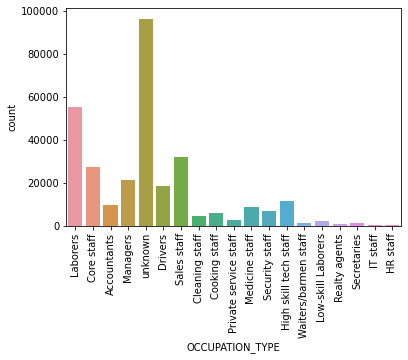

In [60]:
sns.countplot(data=app_data,x= 'OCCUPATION_TYPE')
plt.xticks(rotation=90)
plt.show()

Laborers have the highest values of loan applicants, the null values are high so we will not impute then as it will introduce bias in the data, will keep it as unknown.

#### Errors in Data
##### Changing negative Values present in columns into absolute values

In [61]:
# dataframe description
app_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.068510e+05,246546.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,5.143927e-01,0.510853,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,1.910602e-01,0.194844,2.400989,0.446698,2.379803,0.362291,826.808487,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,0.03476,0.099144,0.016327,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000

In [62]:
# Bringing columns starting with DAYS in columns_abs to remove the negative sign
columns_abs= [i for i in app_data if i.startswith('DAYS')]
columns_abs

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [63]:
app_data[columns_abs]= abs(app_data[columns_abs])
app_data[columns_abs]= app_data[columns_abs]/365

In [64]:
# Checking the dataframe description again to see if negative sign is removed.
app_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.068510e+05,246546.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,43.936973,185.547239,13.660604,8.203294,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,5.143927e-01,0.510853,1.422245,0.143421,1.405292,0.100049,2.637969,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,11.956133,382.037676,9.651743,4.135481,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,1.910602e-01,0.194844,2.400989,0.446698,2.379803,0.362291,2.265229,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,0.03476,0.099144,0.016327,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,20.517808,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,34.008219,2.556164,5.506849,4.712329,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000

#### Handling Outliers 
##### Numerical Columns     

In [65]:
# Names of numerical columns
numerical_category= app_data.select_dtypes(include=np.number).columns
numerical_category

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMEN

In [66]:
#numerical_category_data=app_data.select_dtypes(include=np.number)
#numerical_columns= numerical_category_data.columns
#numerical_columns

In [67]:
# Upper bound = 75th Percentile value+1.5*IQR
# Lower bound = 25th Percentile value-1.5*IQR

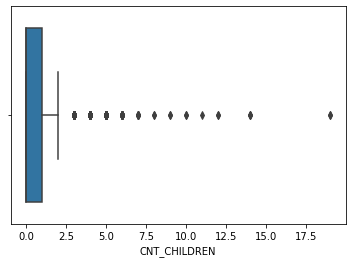

In [68]:
# Boxplot for CNT_CHILDREN
sns.boxplot(app_data.CNT_CHILDREN)
plt.show()

CNT_CHILDREN containes outliers and are not continuous

In [69]:
# Describe CNT_CHILDREN
app_data.CNT_CHILDREN.describe()

count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

In [70]:
# Values above Upper and below Lower bounds are outliers
upper_bound_CNT_CHILDREN=1.000000+1.5*(1.000000-0.000000)
lower_bound_CNT_CHILDREN=0.000000-1.5*(1.000000-0.000000)
print(upper_bound_CNT_CHILDREN)
print(lower_bound_CNT_CHILDREN)

2.5
-1.5


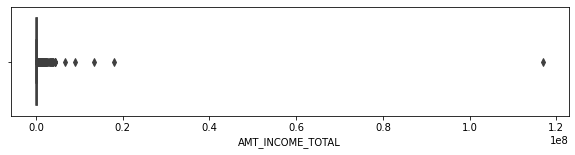

In [71]:
# Boxplot for AMT_INCOME_TOTAL
plt.figure(figsize=(10,2))
sns.boxplot(app_data.AMT_INCOME_TOTAL)
plt.show()

AMT_INCOME_TOTAL containes outliers and are not continuous

In [72]:
# Describe AMT_INCOME_TOTAL
app_data.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [73]:
# Values above Upper and below Lower bounds are outliers
upper_bound_AMT_INCOME_TOTAL=2.025000e+05+1.5*(2.025000e+05-1.125000e+05)
lower_bound_AMT_INCOME_TOTAL=1.125000e+05-1.5*(2.025000e+05-1.125000e+05)
print(upper_bound_AMT_INCOME_TOTAL)
print(lower_bound_AMT_INCOME_TOTAL)

337500.0
-22500.0


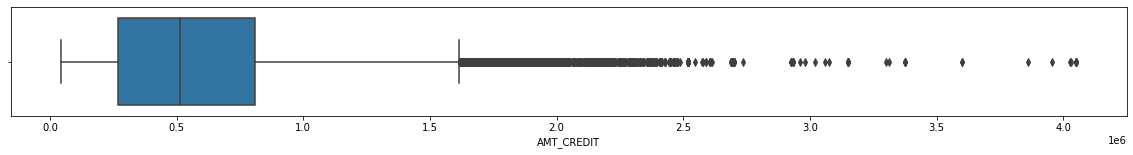

In [74]:
# Boxplot for AMT_CREDIT
plt.figure(figsize=(20,2))
sns.boxplot(app_data.AMT_CREDIT)
plt.show()

AMT_CREDIT containes high values of outliers

In [75]:
# Describe AMT_CREDIT
app_data.AMT_CREDIT.describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [76]:
# Values above Upper and below Lower bounds are outliers
upper_bound_AMT_CREDITL=8.086500e+05+1.5*(8.086500e+05-2.700000e+05)
lower_bound_AMT_CREDIT=2.700000e+05-1.5*(8.086500e+05-2.700000e+05)
print(upper_bound_AMT_CREDITL)
print(lower_bound_AMT_CREDIT)

1616625.0
-537975.0


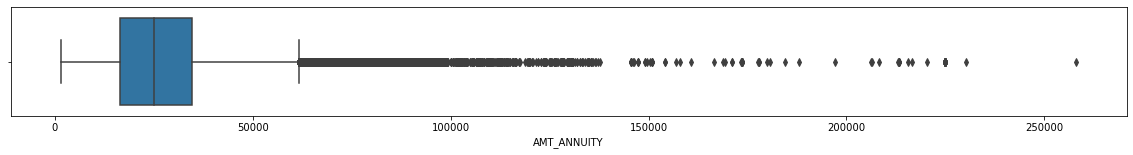

In [77]:
# Boxplot for AMT_ANNUITY
plt.figure(figsize=(20,2))
sns.boxplot(app_data.AMT_ANNUITY)
plt.show()

AMT_ANNUITY containes high values of outliers

In [78]:
# Describe AMT_ANNUITY
app_data.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [79]:
# Values above Upper and below Lower bounds are outliers
upper_bound_AMT_ANNUITY=34596+1.5*(34596-16524)
lower_bound_AMT_ANNUITYL=16524-1.5*(34596-16524)
print(upper_bound_AMT_ANNUITY)
print(lower_bound_AMT_ANNUITYL)

61704.0
-10584.0


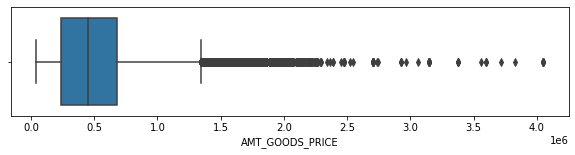

In [80]:
# Boxplot for AMT_GOODS_PRICE
plt.figure(figsize=(10,2))
sns.boxplot(app_data.AMT_GOODS_PRICE)
plt.show()

AMT_GOODS_PRICE containes high values of outliers

In [81]:
# Describe AMT_GOODS_PRICE
app_data.AMT_GOODS_PRICE.describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [82]:
# Values above Upper and below Lower bounds are outliers
upper_bound_AMT_GOODS_PRICE=6.795000e+05+1.5*(6.795000e+05-2.385000e+05)
lower_bound_AMT_GOODS_PRICE=2.385000e+05-1.5*(6.795000e+05-2.385000e+05)
print(upper_bound_AMT_GOODS_PRICE)
print(lower_bound_AMT_GOODS_PRICE)

1341000.0
-423000.0


#### XNA values in CODE_GENDER column

In [83]:
# Female and Male counts in CODE_GENDER
app_data.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [84]:
# Updating XNA values to F to make CODE_GENDER more readable
app_data.loc[app_data['CODE_GENDER']=='XNA', 'CODE_GENDER']='F'
app_data.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [85]:
# counts in ORGANIZATION_TYPE
app_data.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [86]:
# Replacing XNA values in ORGANIZATION_TYPE to NaN
app_data.loc[app_data['ORGANIZATION_TYPE']=='XNA', 'ORGANIZATION_TYPE']='np.NaN'
app_data.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
np.NaN                    55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

#### Binning of variables

In [87]:
# total counts in AMT_CREDIT
app_data.AMT_CREDIT.value_counts()

450000.0     9709
675000.0     8877
225000.0     8162
180000.0     7342
270000.0     7241
             ... 
487318.5        1
630400.5        1
1875276.0       1
1395895.5       1
1391130.0       1
Name: AMT_CREDIT, Length: 5603, dtype: int64

In [88]:
# Binning AMT_CREDIT Column
#bins = [i for i in range(0,1000000,25000)]
bins= [0,50000,100000,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
ranges= ['0-50000','50000-100000','100000-150000','150000-200000','200000-250000','250000-300000','300000-350000','350000-400000','400000-450000','450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000','800000-850000','850000-900000','900000 and above']
app_data['AMT_CREDIT_RANGE']= pd.cut(app_data['AMT_CREDIT'],bins=bins,labels=ranges)
app_data['AMT_CREDIT_RANGE'].value_counts(ascending=True)

0-50000               561
50000-100000         5443
700000-750000        6813
600000-650000        8998
350000-400000       10133
850000-900000       10233
550000-600000       11554
800000-850000       11559
100000-150000       12155
750000-800000       12380
450000-500000       13799
650000-700000       15051
300000-350000       16205
150000-200000       17985
400000-450000       18239
500000-550000       22678
200000-250000       23054
250000-300000       31759
900000 and above    58912
Name: AMT_CREDIT_RANGE, dtype: int64

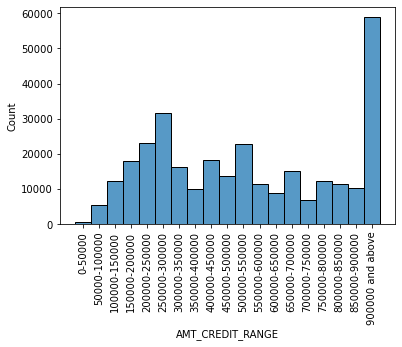

In [89]:
# plot for AMT_CREDIT_RANGE after binning
bins = [i for i in range(0,1000000000,50000)]
sns.histplot(app_data['AMT_CREDIT_RANGE'],bins=bins)
plt.xticks(rotation=90)
plt.show()

In [90]:
# Binning AMT_INCOME_TOTAL Column
bins= [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,1000000000]
slot= ['0-25000','25000-50000','50000-75000','75000-100000','100000-125000','125000-150000','150000-175000','175000-200000','200000-225000','225000-250000',
       '250000-275000','275000-300000','300000-325000','325000-350000','350000-375000','375000-400000','400000-425000','425000-450000','450000-475000',
       '475000-500000','500000 and above']
app_data['AMT_INCOME_TOTAL_RANGE']= pd.cut(app_data['AMT_INCOME_TOTAL'],bins=bins,labels=slot)
app_data['AMT_INCOME_TOTAL_RANGE'].value_counts(ascending = True)

0-25000                 0
450000-475000         125
475000-500000         312
375000-400000        1265
400000-425000        1811
325000-350000        2122
500000 and above     2702
425000-450000        3113
275000-300000        4306
25000-50000          4517
350000-375000        4537
300000-325000        6752
225000-250000        7340
250000-275000       12733
50000-75000         19375
175000-200000       29644
150000-175000       34663
75000-100000        39806
200000-225000       40797
100000-125000       43701
125000-150000       47890
Name: AMT_INCOME_TOTAL_RANGE, dtype: int64

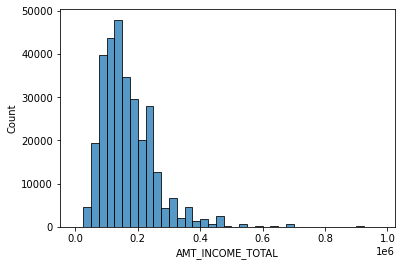

In [91]:
# plot for AMT_INCOME_TOTAL column
bins = [i for i in range(0,1000000,25000)]
sns.histplot(app_data['AMT_INCOME_TOTAL'],bins=bins)
plt.show()

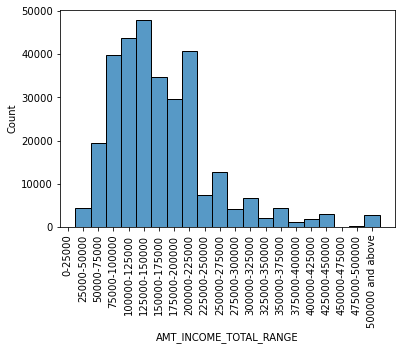

In [92]:
# plot AMT_INCOME_TOTAL_RANGE after binning
sns.histplot(app_data['AMT_INCOME_TOTAL_RANGE'])
plt.xticks(rotation=90)
plt.show()

In [93]:
# Binning AMT_GOODS_PRICE Column
app_data['AMT_GOODS_PRICE_CATEGORY']= pd.cut(app_data['AMT_GOODS_PRICE'],bins=5, labels=['Very Low','Low','Medium','High','Very High'])
app_data['AMT_GOODS_PRICE_CATEGORY'].value_counts()

Very Low     246973
Low           56087
Medium         4108
High             47
Very High        18
Name: AMT_GOODS_PRICE_CATEGORY, dtype: int64

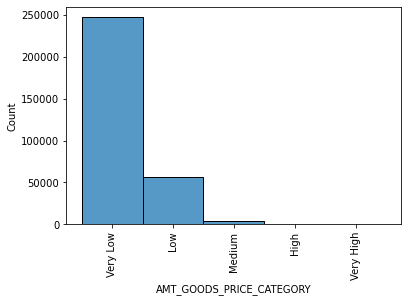

In [94]:
# plot AMT_GOODS_PRICE_CATEGORY after binning
sns.histplot(app_data['AMT_GOODS_PRICE_CATEGORY'])
plt.xticks(rotation=90)
plt.show()

In [95]:
# Binning AMT_GOODS_PRICE Column
app_data['AMT_GOODS_PRICE_CATEGORY']= pd.cut(app_data['AMT_GOODS_PRICE'],bins=5, labels=['Very Low','Low','Medium','High','Very High'])
app_data['AMT_GOODS_PRICE_CATEGORY'].value_counts()

Very Low     246973
Low           56087
Medium         4108
High             47
Very High        18
Name: AMT_GOODS_PRICE_CATEGORY, dtype: int64

In [96]:
# DAYS_BIRTH column is already divided by 365 in app_data[columns_abs]= app_data[columns_abs]/365
app_data['DAYS_BIRTH'].value_counts()

37.668493    43
36.934247    42
49.994521    41
27.452055    41
43.208219    40
             ..
68.213699     1
68.131507     1
21.964384     1
68.761644     1
68.660274     1
Name: DAYS_BIRTH, Length: 17460, dtype: int64

In [97]:
# creating new YEAR_BIRTH column
bins=[0,15,30,45,60,75,90,100]
slots = ['0-15','15-30','30-45','45-60','60-75','75-90','90 and above']
app_data['YEAR_BIRTH']=pd.cut(app_data['DAYS_BIRTH'],bins=bins,labels=slots)
app_data['YEAR_BIRTH'].value_counts()

30-45           123714
45-60           103197
15-30            45021
60-75            35579
0-15                 0
75-90                0
90 and above         0
Name: YEAR_BIRTH, dtype: int64

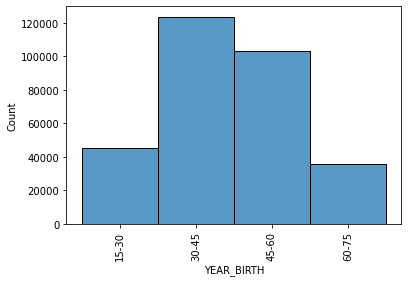

In [98]:
# plot YEAR_BIRTH after binning
sns.histplot(app_data['YEAR_BIRTH'])
plt.xticks(rotation=90)
plt.show()

### Data Imbalance

#### Data imbalance in the TARGET column

In [99]:
# counts of TARGET column
app_data.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [100]:
# normalized values of TARGET column
app_data.TARGET.value_counts(normalize=True)*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

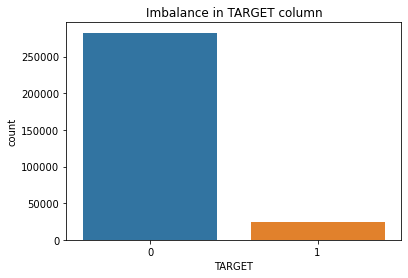

In [101]:
# using countplot checking the data imbalance in TARGET column
sns.countplot(data=app_data, x=app_data['TARGET'])
plt.title('Imbalance in TARGET column')
plt.show()

#### Splitting/Segmenting the data based on TARGET column

##### Customers with payment difficulties TARGET==1 and Others with TARGET==0

In [102]:
# creating new dataframe for Customers facing payment difficulties with TARGET==1
TARGET_1= app_data.loc[app_data['TARGET']==1]
TARGET_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT_RANGE,AMT_INCOME_TOTAL_RANGE,AMT_GOODS_PRICE_CATEGORY,YEAR_BIRTH
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25.920548,1.745205,9.994521,5.808219,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,3.106849,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,400000-450000,200000-225000,Very Low,15-30
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,51.298630,7.200000,18.008219,5.005479,1,1,0,1,0,0,Cooking staff,1.0,3,2,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.548477,0.190706,10.0,1.0,10.0,0.0,0.441096,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0,900000 and above,100000-125000,Very Low,45-60
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,47.895890,3.457534,3.238356,2.819178,1,1,0,1,0,0,Laborers,2.0,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.306841,0.320163,0.0,0.0,0.0,0.0,2.945205,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2.0,0.0,4.0,900000 and above,200000-225000,Low,45-60
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,36.668493,9.854795,0.123288,12.079452,1,1,1,1,1,0,Sales staff,2.0,3,3,THURSDAY,11,0,0,0,0,0,0,Self-employed,0.674203,0.399676,1.0,0.0,1.0,0.0,4.054795,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,250000-300000,125000-150000,Very Low,30-45
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,252000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.028663,67.928767,1000.665753,14.769863,11.504110,1,0,0,1,0,0,unknown,2.0,2,2,THURSDAY,10,0,0,0,0,0,0,np.NaN,0.023952,0.720944,1.0,1.0,1.0,1.0,0.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,250000-300000,75000-100000,Very Low,60-75


In [103]:
# TARGET_1 total counts
TARGET_1.value_counts().sum()

19032

In [104]:
# TARGET total counts in TARGET_1
TARGET_1.TARGET.value_counts()

1    24825
Name: TARGET, dtype: int64

In [105]:
# creating new dataframe for other Customers with TARGET==0
TARGET_0= app_data.loc[app_data['TARGET']==0]
TARGET_0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT_RANGE,AMT_INCOME_TOTAL_RANGE,AMT_GOODS_PRICE_CATEGORY,YEAR_BIRTH
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45.931507,3.254795,3.249315,0.797260,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,2.268493,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,900000 and above,250000-275000,Low,45-60
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52.180822,0.616438,11.671233,6.934247,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,2.232877,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,100000-150000,50000-75000,Very Low,45-60
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52.068493,8.326027,26.939726,6.676712,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,1.690411,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,300000-350000,125000-150000,Very Low,45-60
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54.608219,8.323288,11.810959,9.473973,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,3.030137,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,500000-550000,100000-125000,Very Low,45-60
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,46.413699,4.350685,13.616438,1.306849,1,1,1,1,1,0,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,0.0,0.0,0.0,0.0,6.947945,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,450000-500000,75000-100000,Very Low,45-60


In [106]:
# TARGET_0 total counts
TARGET_0.value_counts().sum()

225248

In [107]:
# TARGET total counts in TARGET_0
TARGET_0.TARGET.value_counts()

0    282686
Name: TARGET, dtype: int64

#### Univariate Analysis

##### Univariate analysis for numerical (or continuous) columns/categories

In [108]:
#Function to plot numerical (or continuous) columns/categories
def univariateanalysis(var):
   # plt.figure(figsize[10,5])
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(25,5))
    
    sns.distplot(a= TARGET_1[var],ax=ax1)
    ax1.set_title(f'Distribution of {var} for Payment Difficulties',fontsize=15)
    
    sns.distplot(a= TARGET_0[var],ax=ax2)
    ax2.set_title(f'Distribution of {var} for Others',fontsize=15)
    plt.show()

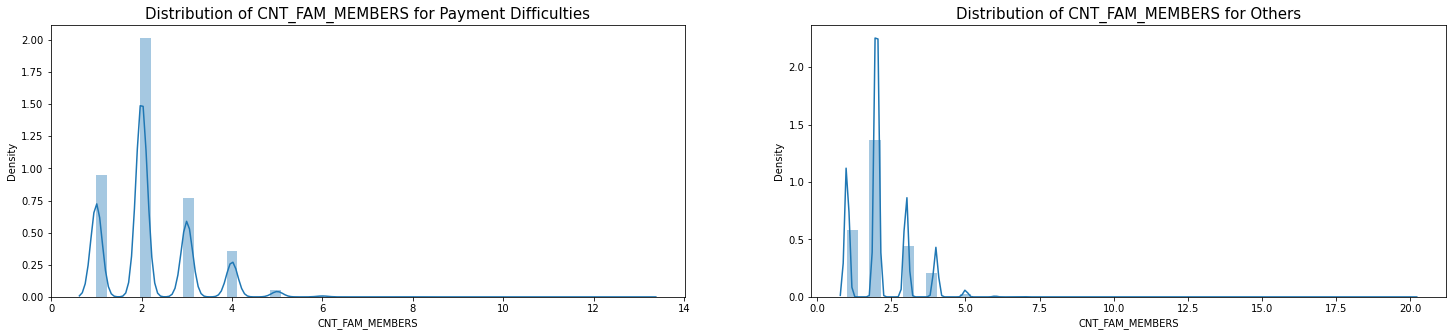

In [109]:
# CNT_FAM_MEMBERS columns/categories
univariateanalysis('CNT_FAM_MEMBERS')

For CNT_FAM_MEMBERS there is not much variation in Distribution of CNT_FAM_MEMBERS for Payment Difficulties and Others 

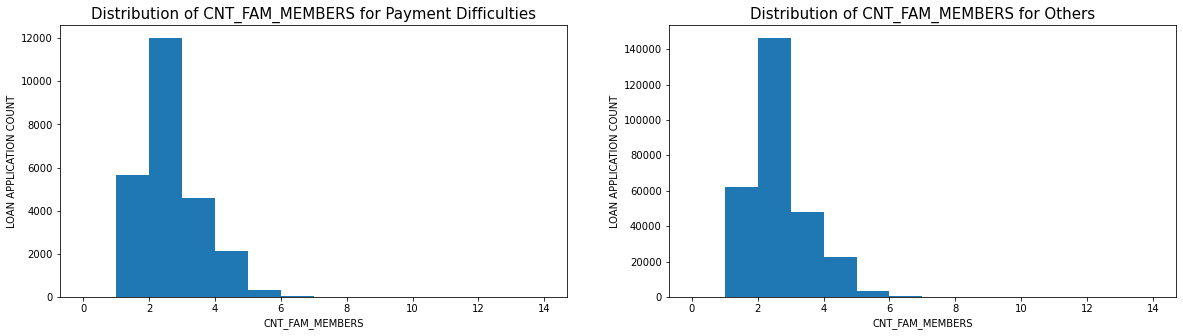

In [110]:
#Function to plot hist numerical (or continuous) columns/categorie
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
TARGET_1['CNT_FAM_MEMBERS'].plot.hist(bins=range(15))
plt.title('Distribution of CNT_FAM_MEMBERS for Payment Difficulties',fontsize=15)
plt.xlabel('CNT_FAM_MEMBERS')
plt.ylabel('LOAN APPLICATION COUNT')
   
plt.subplot(1,2,2)
TARGET_0['CNT_FAM_MEMBERS'].plot.hist(bins=range(15))
plt.title('Distribution of CNT_FAM_MEMBERS for Others',fontsize=15)
plt.xlabel('CNT_FAM_MEMBERS')
plt.ylabel('LOAN APPLICATION COUNT')
plt.show()

CNT_FAM_MEMBERS having family members 3

In [111]:
# CNT_FAM_MEMBERS facing Payment Difficulties
TARGET_1.CNT_FAM_MEMBERS.value_counts()

2.0     12009
1.0      5675
3.0      4608
4.0      2136
5.0       327
6.0        55
7.0         6
8.0         6
10.0        1
13.0        1
11.0        1
Name: CNT_FAM_MEMBERS, dtype: int64

In [112]:
# CNT_FAM_MEMBERS for Others
TARGET_0.CNT_FAM_MEMBERS.value_counts()

2.0     146348
1.0      62172
3.0      47993
4.0      22561
5.0       3151
6.0        353
7.0         75
8.0         14
9.0          6
10.0         2
14.0         2
12.0         2
20.0         2
16.0         2
15.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

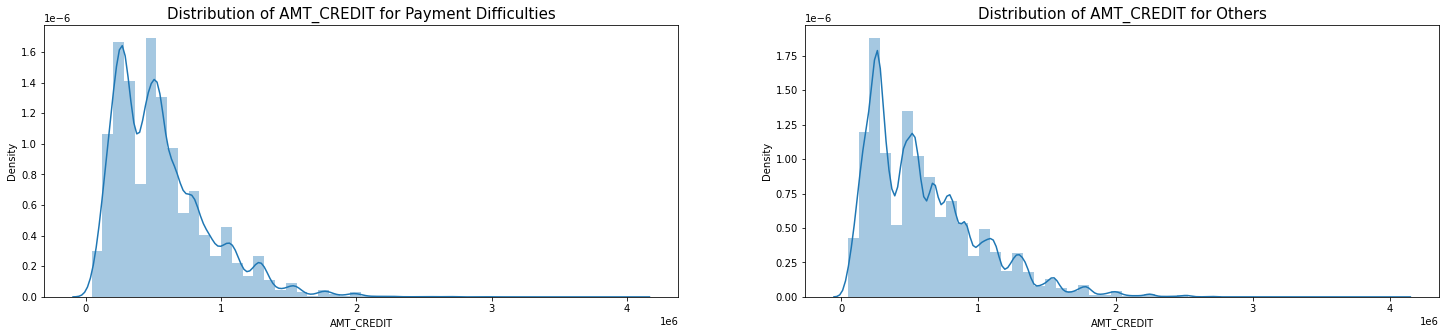

In [113]:
# AMT_CREDIT column/category
univariateanalysis('AMT_CREDIT')

In [114]:
# AMT_CREDIT facing Payment Difficulties
TARGET_1.AMT_CREDIT.value_counts()

450000.0     1058
545040.0      746
675000.0      668
225000.0      597
180000.0      592
             ... 
320040.0        1
988875.0        1
1692085.5       1
319441.5        1
1149628.5       1
Name: AMT_CREDIT, Length: 2504, dtype: int64

In [115]:
# AMT_CREDIT for Others
TARGET_0.AMT_CREDIT.value_counts()

450000.0     8651
675000.0     8209
225000.0     7565
270000.0     6794
180000.0     6750
             ... 
553005.0        1
296671.5        1
495486.0        1
546021.0        1
1391130.0       1
Name: AMT_CREDIT, Length: 5488, dtype: int64

People not facing problem in loan repayment get more AMT_CREDIT

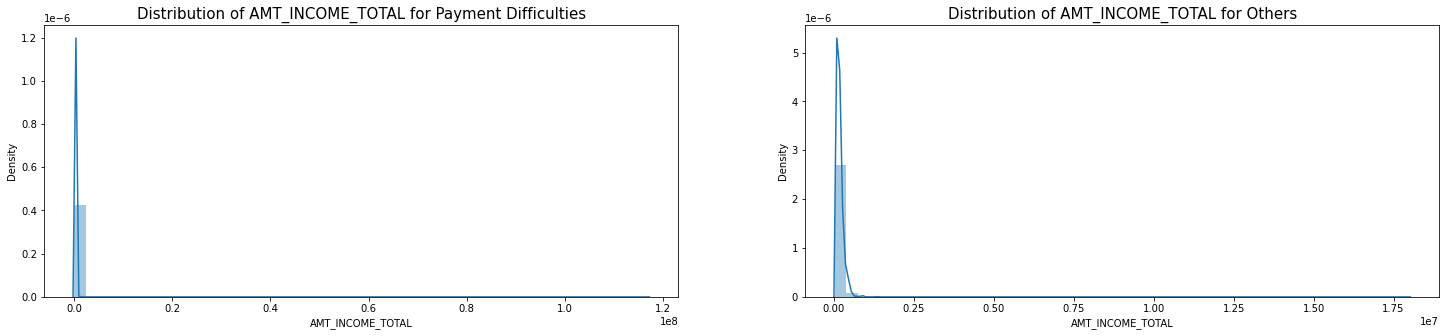

In [116]:
# AMT_INCOME_TOTAL column/category
univariateanalysis('AMT_INCOME_TOTAL')

In [117]:
# AMT_INCOME_TOTAL facing Payment Difficulties
TARGET_1.AMT_INCOME_TOTAL.value_counts()

135000.0       2983
112500.0       2720
157500.0       2307
180000.0       2083
90000.0        1844
225000.0       1567
202500.0       1327
67500.0         911
270000.0        751
81000.0         563
126000.0        412
247500.0        383
121500.0        365
315000.0        349
99000.0         323
103500.0        308
144000.0        283
76500.0         272
292500.0        258
360000.0        234
171000.0        216
117000.0        214
166500.0        180
54000.0         179
72000.0         164
45000.0         149
108000.0        145
94500.0         145
450000.0        142
148500.0        135
162000.0        128
189000.0        121
85500.0         119
216000.0        117
337500.0        115
405000.0        105
130500.0        103
63000.0          98
153000.0         94
211500.0         90
58500.0          89
139500.0         80
193500.0         79
175500.0         68
382500.0         67
49500.0          60
252000.0         50
540000.0         48
184500.0         48
207000.0         45


In [118]:
# AMT_INCOME_TOTAL for Others
TARGET_0.AMT_INCOME_TOTAL.value_counts()

135000.0    32767
112500.0    28299
157500.0    24249
180000.0    22636
90000.0     20639
            ...  
159435.0        1
123480.0        1
110475.0        1
163363.5        1
113062.5        1
Name: AMT_INCOME_TOTAL, Length: 2450, dtype: int64

AMT_INCOME_TOTAL is more for Others(not having difficulties in loan repayment) than the customers having difficulties in loan repayment.

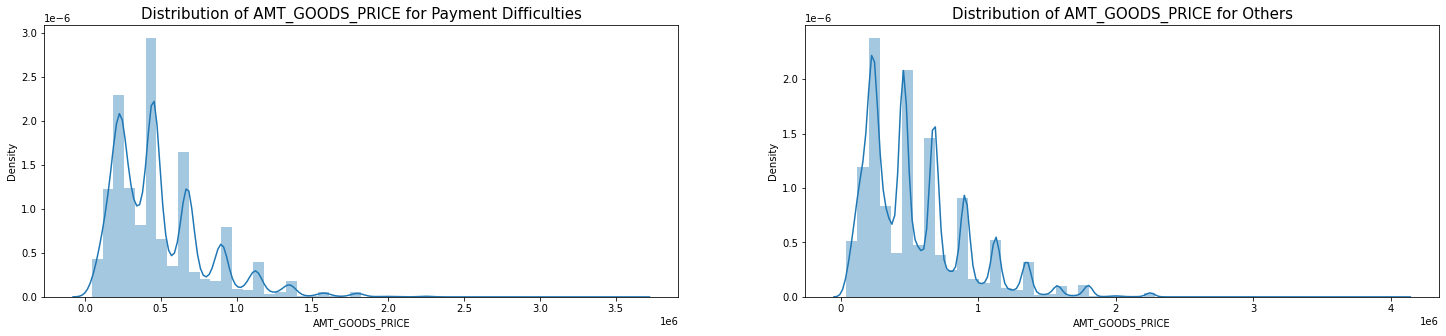

In [119]:
# AMT_GOODS_PRICE column/category
univariateanalysis('AMT_GOODS_PRICE')

In [120]:
# AMT_GOODS_PRICE facing Payment Difficulties
TARGET_1.AMT_GOODS_PRICE.value_counts()

450000.0     3576
225000.0     2294
675000.0     2204
900000.0     1048
180000.0      854
270000.0      830
135000.0      534
454500.0      524
1125000.0     516
360000.0      487
315000.0      480
238500.0      356
247500.0      287
405000.0      279
495000.0      245
463500.0      234
540000.0      233
202500.0      224
1350000.0     222
337500.0      217
472500.0      200
229500.0      194
90000.0       191
679500.0      188
157500.0      185
585000.0      178
630000.0      176
292500.0      151
112500.0      146
252000.0      142
283500.0      136
382500.0      134
477000.0      126
148500.0      116
810000.0      102
720000.0      102
328500.0       99
688500.0       99
234000.0       91
67500.0        88
765000.0       88
256500.0       87
1800000.0      85
373500.0       85
855000.0       85
387000.0       80
427500.0       80
1575000.0      78
697500.0       73
193500.0       71
261000.0       69
243000.0       67
562500.0       67
481500.0       65
103500.0       64
945000.0  

In [121]:
# AMT_GOODS_PRICE for Others
TARGET_0.AMT_GOODS_PRICE.value_counts()

225000.0     22988
675000.0     22758
450000.0     22446
900000.0     14368
270000.0     10598
             ...  
412227.0         1
2106000.0        1
894654.0         1
447804.0         1
743863.5         1
Name: AMT_GOODS_PRICE, Length: 948, dtype: int64

AMT_GOODS_PRICE loan applicant facing difficulties in loan repayment are more in the range of 250000 to 675000 for TARGET_1
Overall loan applicants are more in TARGET_0

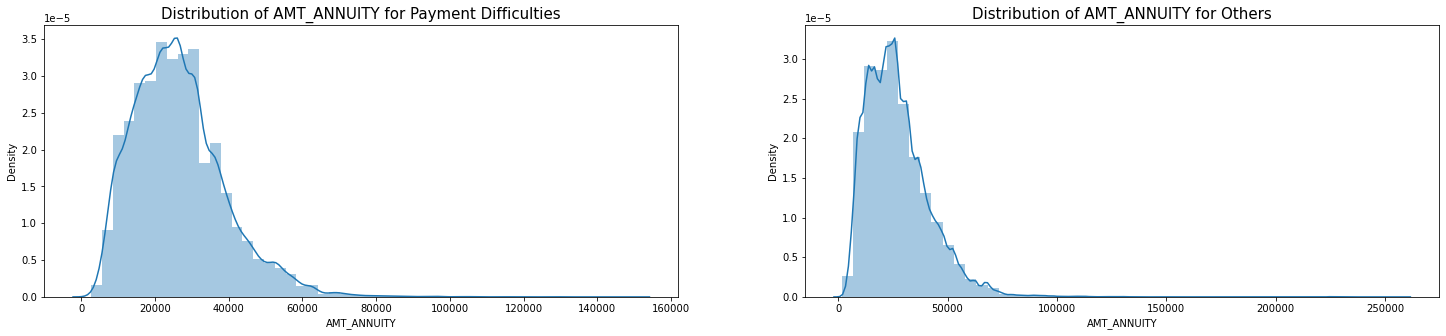

In [122]:
# AMT_ANNUITY column/category
univariateanalysis('AMT_ANNUITY')

In [123]:
# AMT_ANNUITY facing Payment Difficulties
TARGET_1.AMT_ANNUITY.value_counts()

9000.0     516
13500.0    312
26640.0    248
31261.5    200
25537.5    161
          ... 
32368.5      1
33201.0      1
11416.5      1
45553.5      1
46809.0      1
Name: AMT_ANNUITY, Length: 6119, dtype: int64

In [124]:
# AMT_ANNUITY for Others
TARGET_0.AMT_ANNUITY.value_counts()

9000.0      5869
13500.0     5202
6750.0      2125
10125.0     1906
37800.0     1490
            ... 
3042.0         1
58756.5        1
177696.0       1
47097.0        1
77809.5        1
Name: AMT_ANNUITY, Length: 13522, dtype: int64

AMT_ANNUITY facing Payment Difficulties is more in the range of 135000 to 325000

AMT_ANNUITY for Others is more in range 5000 to 40000

##### Univariate analysis for Categorical columns

In [125]:
# Categorical columns= Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY','NAME_TYPE_SUITE', 
#                            'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 
#                            'OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],dtype='object')

In [126]:
def UnivariatCategorical(var1):
    plt.figure(figsize=[10,5])
    plt.subplot(1,2,1)
    (TARGET_1[var1].value_counts(normalize=True)*100).plot.bar(title = var1 + ' Facing Payment Difiiiculties')
    plt.xticks(rotation=0)
    
    plt.subplot(1,2,2)
    (TARGET_0[var1].value_counts(normalize=True)*100).plot.bar(title = var1 + ' Others')
    plt.xticks(rotation=0)
    
    plt.show()

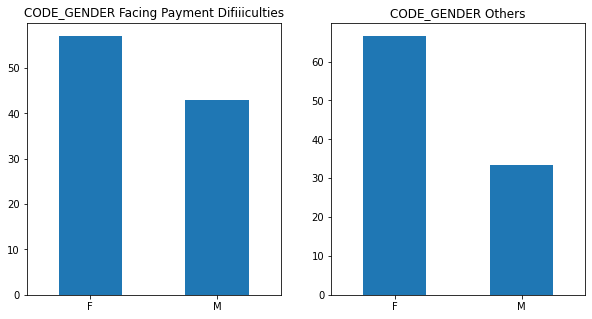

In [127]:
UnivariatCategorical('CODE_GENDER')

In CODE_GENDER Female are Facing more Payment Difiiiculties in TARGET_1

But Overall Female are applying more for loan

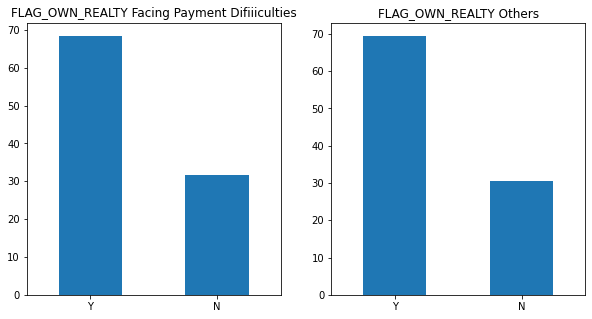

In [128]:
UnivariatCategorical('FLAG_OWN_REALTY')

In FLAG_OWN_REALTY customer who own house are applying more for loan and around 68% are defaulters who own a house 

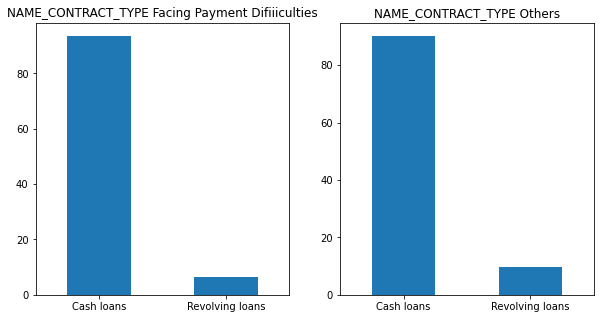

In [129]:
UnivariatCategorical('NAME_CONTRACT_TYPE')

In NAME_CONTRACT_TYPE customers apply for cash loans are more and the graph is almost similar

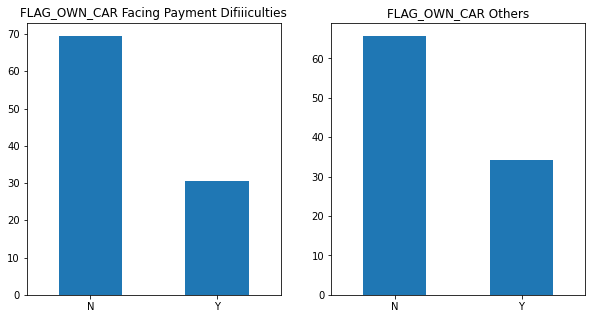

In [130]:
UnivariatCategorical('FLAG_OWN_CAR')

In FLAG_OWN_CAR customer who own car are applying more for loan and around 70% are defaulters who own a car

In [131]:
def UnivariatCategorical1(var1):
    plt.figure(figsize=[10,5])
    plt.subplot(1,2,1)
    (TARGET_1[var1].value_counts(normalize=True)*100).plot.bar(title = var1 + ' Facing Payment Difiiiculties')
    plt.xticks(rotation=90)
    
    plt.subplot(1,2,2)
    (TARGET_0[var1].value_counts(normalize=True)*100).plot.bar(title = var1 + ' Others')
    plt.xticks(rotation=90)
    
    plt.show()

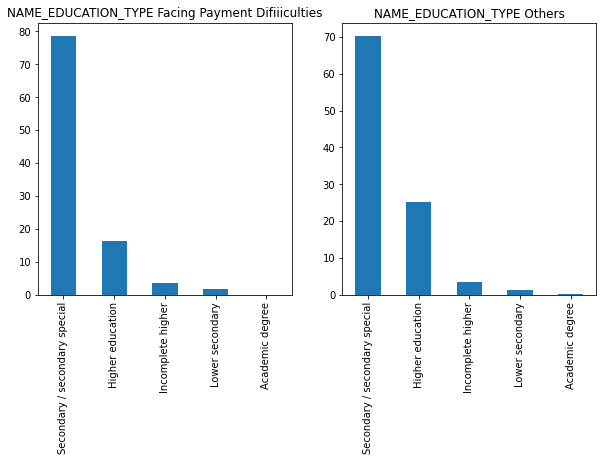

In [132]:
UnivariatCategorical1('NAME_EDUCATION_TYPE')

In NAME_EDUCATION_TYPE Secondary/Secondary special are more likely to have payment difficulties followed by Higher education. But Secondary/Secondary special apply more for loan followed by Higher education.

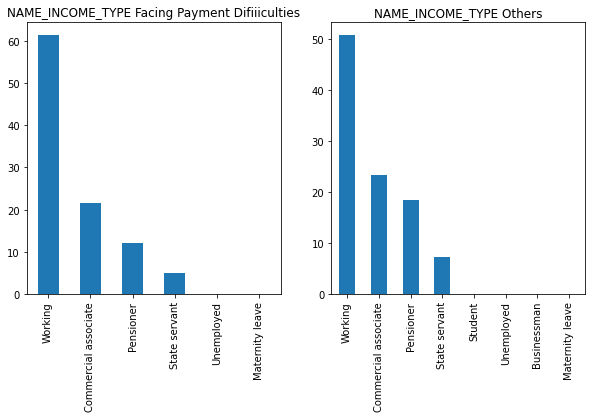

In [133]:
UnivariatCategorical1('NAME_INCOME_TYPE')

In NAME_INCOME_TYPE Working class are more likely to have payment difficulties followed by Commercial associate. But Working class apply more for loan followed by Commercial associate then Pensioner.

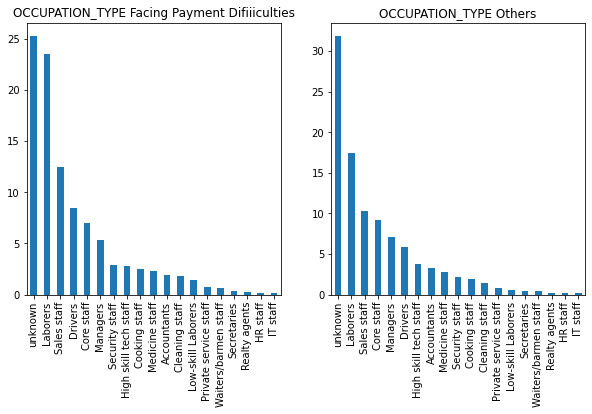

In [134]:
UnivariatCategorical1('OCCUPATION_TYPE')

In OCCUPATION_TYPE Laborers are more likely to have payment difficulties. But Laborers apply more for loan followed by Sales staff, Core staff etc.

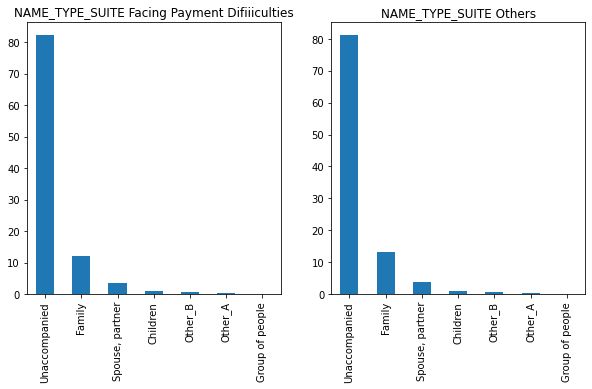

In [135]:
UnivariatCategorical1('NAME_TYPE_SUITE')

In NAME_TYPE_SUITE Unaccompanied category has more defaulter and they also are more in number for applying loan.

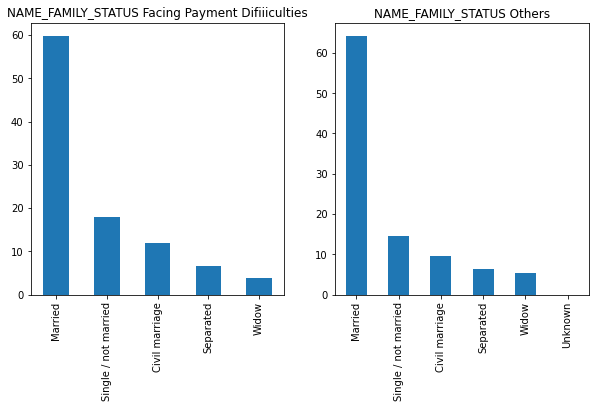

In [136]:
UnivariatCategorical1('NAME_FAMILY_STATUS')

In NAME_FAMILY_STATUS married category have payment difficulties as well as they are more in number for applying loan.

In [137]:
def UnivariatCategorical2(var1):
    plt.figure(figsize=[25,5])
    plt.subplot(1,2,1)
    (TARGET_1[var1].value_counts(normalize=True)*100).plot.bar(title = var1 + ' Facing Payment Difiiiculties')
    plt.xticks(rotation=90)
    
    plt.subplot(1,2,2)
    (TARGET_0[var1].value_counts(normalize=True)*100).plot.bar(title = var1 + ' Others')
    plt.xticks(rotation=90)
    
    plt.show()

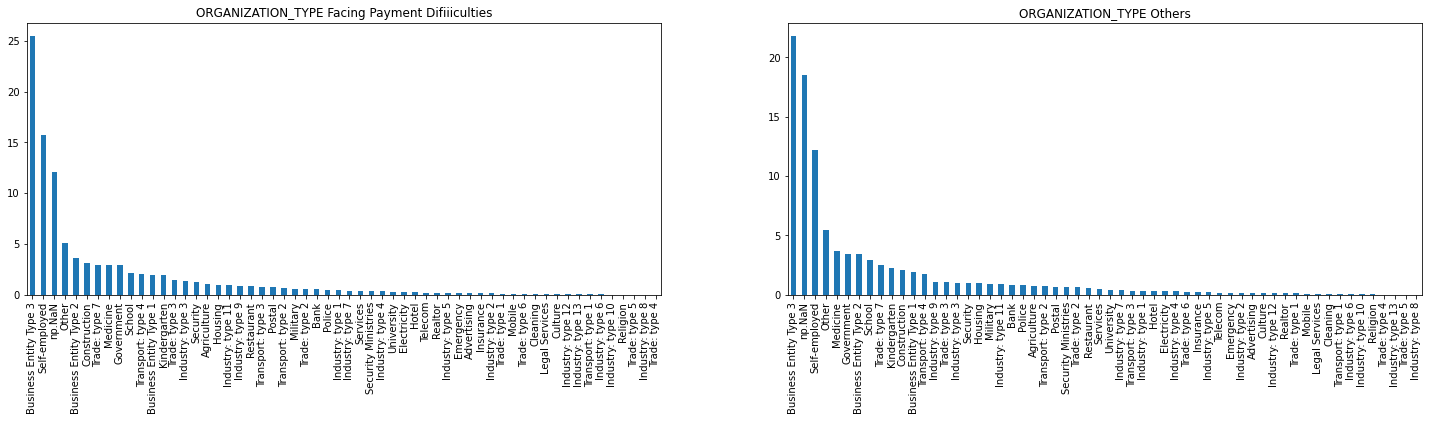

In [138]:
UnivariatCategorical2('ORGANIZATION_TYPE')

In ORGANIZATION_TYPE, Business Entity Type 3 category have payment difficulties as well as they more in number to apply for loan.

#### Bivariate Analysis

##### Numerical Vs Numerical Category

In [139]:
# Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE',
#        'DAYS_BIRTH', 'DAYS_EMPLOYED','DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE','FLAG_WORK_PHONE',
#        'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY',
#        'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 
#        'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2','EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE',
#        'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2',
#        'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
#        'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
#        'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
#        'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
#        'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],dtype='object')

In [140]:
# Bivariate Analysis function
def BivariatCategorical1(var1,var2):
    plt.figure(figsize=[15,5])
    plt.subplot(1,2,1)
    sns.scatterplot(x=TARGET_1[var1], y= TARGET_1[var2], data= TARGET_1)
    plt.title('Payment Difficulties')
    plt.ticklabel_format(style='plain', axis='x')
    plt.ticklabel_format(style='plain', axis='y')
    plt.xticks(rotation=90)
    
    plt.subplot(1,2,2)
    sns.scatterplot(x=TARGET_0[var1], y= TARGET_0[var2], data= TARGET_0)
    plt.title('Others')
    plt.ticklabel_format(style='plain', axis='x')
    plt.ticklabel_format(style='plain', axis='y')
    plt.xticks(rotation=90)
    
    plt.show()

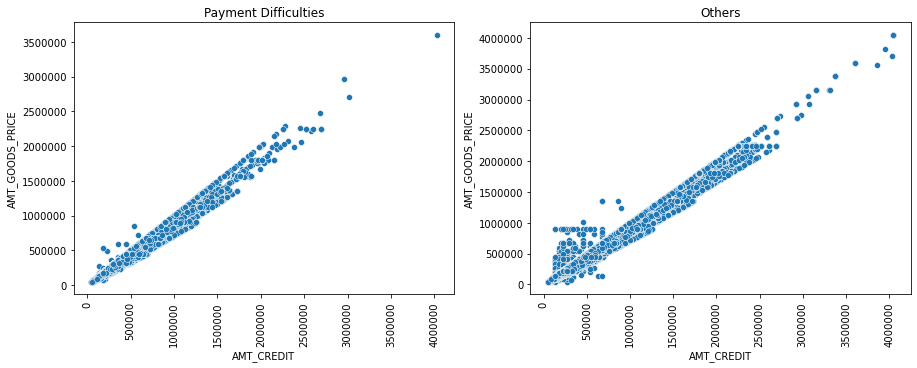

In [141]:
# Bivariant analysis between AMT_CREDIT and AMT_GOODS_PRICE for TARGET_1 and TARGET_0
BivariatCategorical1('AMT_CREDIT','AMT_GOODS_PRICE')

AMT_CREDIT and AMT_GOODS_PRICE show linear relation i.e if the AMT_GOODS_PRICE increases the AMT_CREDIT also increases

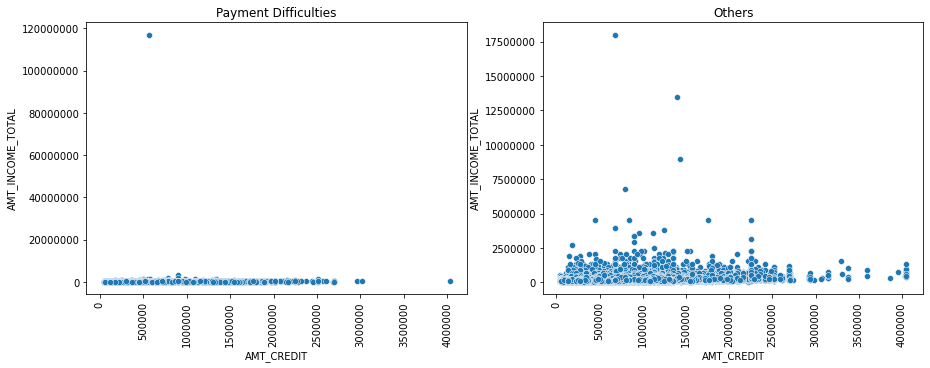

In [142]:
# Bivariant analysis between AMT_CREDIT and AMT_INCOME_TOTAL for TARGET_1 and TARGET_0
BivariatCategorical1('AMT_CREDIT','AMT_INCOME_TOTAL')

AMT_CREDIT and AMT_INCOME_TOTAL doesn't show a linear pattern

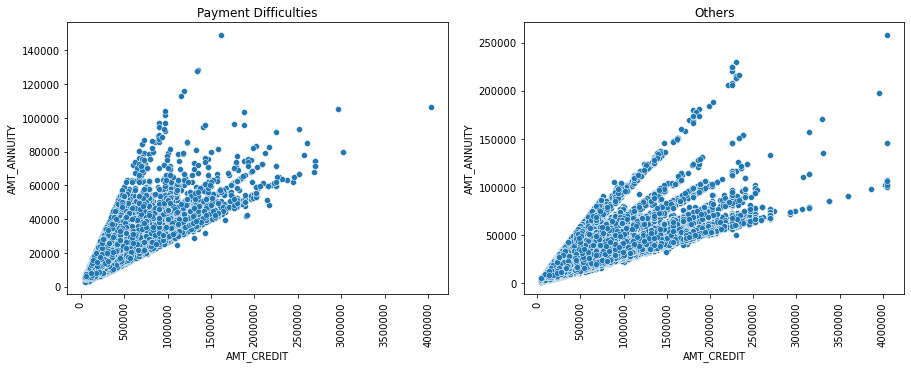

In [143]:
# Bivariant analysis between AMT_CREDIT and AMT_ANNUITY for TARGET_1 and TARGET_0
BivariatCategorical1('AMT_CREDIT','AMT_ANNUITY')

AMT_CREDIT and AMT_ANNUITY show almost linear relation i.e if the AMT_ANNUITY increases the AMT_CREDIT also increases

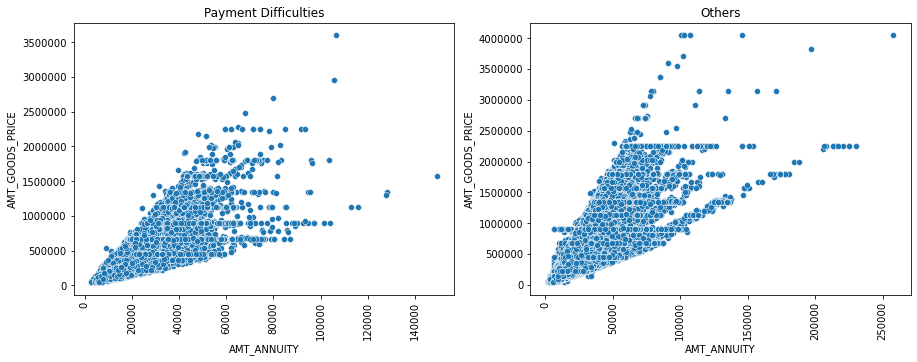

In [144]:
# Bivariant analysis between AMT_ANNUITY and AMT_GOODS_PRICE for TARGET_1 and TARGET_0
BivariatCategorical1('AMT_ANNUITY','AMT_GOODS_PRICE')

AMT_ANNUITY and AMT_GOODS_PRICE show almost linear relation i.e if the AMT_ANNUITY increases the AMT_GOODS_PRICE also increases

##### Categorical Vs Numerical Category

###### For Customers with Payment Difficulties = TARGET_1 and Others= TARGET_0

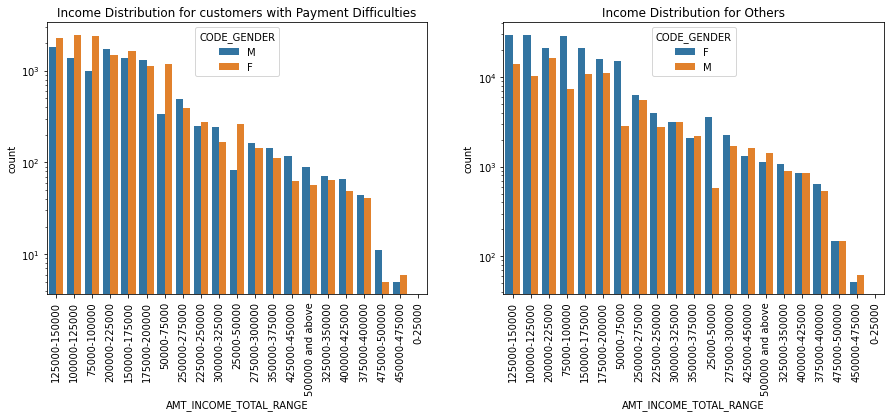

In [145]:
# Bivariate Analysis between AMT_INCOME_TOTAL_RANGE and CODE_GENDER of TARGET_1 and TARGET_0
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
sns.countplot(data=TARGET_1,x='AMT_INCOME_TOTAL_RANGE',order=TARGET_1['AMT_INCOME_TOTAL_RANGE'].value_counts().index, hue='CODE_GENDER')
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('Income Distribution for customers with Payment Difficulties')

plt.subplot(1,2,2)
sns.countplot(data=TARGET_0,x='AMT_INCOME_TOTAL_RANGE',order=TARGET_0['AMT_INCOME_TOTAL_RANGE'].value_counts().index, hue='CODE_GENDER')
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('Income Distribution for Others')
plt.show()

AMT_INCOME_TOTAL_RANGE in the range of 50000 to 150000 have more face difficulties in loan repayment and Female apply more for loan as compared to Male

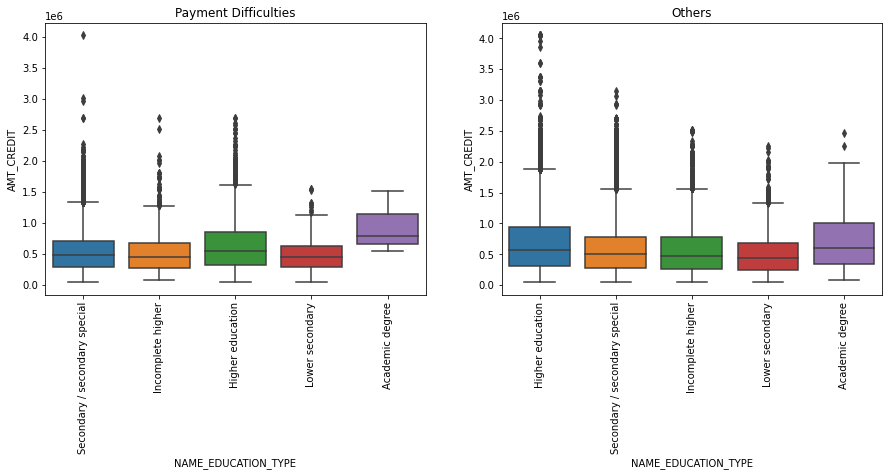

In [146]:
# Bivariate Analysis between NAME_EDUCATION_TYPE and AMT_CREDIT of TARGET_1 and TARGET_0
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
sns.boxplot(data =TARGET_1,x= 'NAME_EDUCATION_TYPE', y='AMT_CREDIT' )
plt.xticks(rotation=90)
plt.title('Payment Difficulties')

plt.subplot(1,2,2)
sns.boxplot(data =TARGET_0,x= 'NAME_EDUCATION_TYPE', y='AMT_CREDIT' )
plt.xticks(rotation=90)
plt.title('Others')
plt.show()

In NAME_EDUCATION_TYPE Academic degree category faces difficulties in getting loan and Higher education and Academic degree gets more AMT_CREDIT.

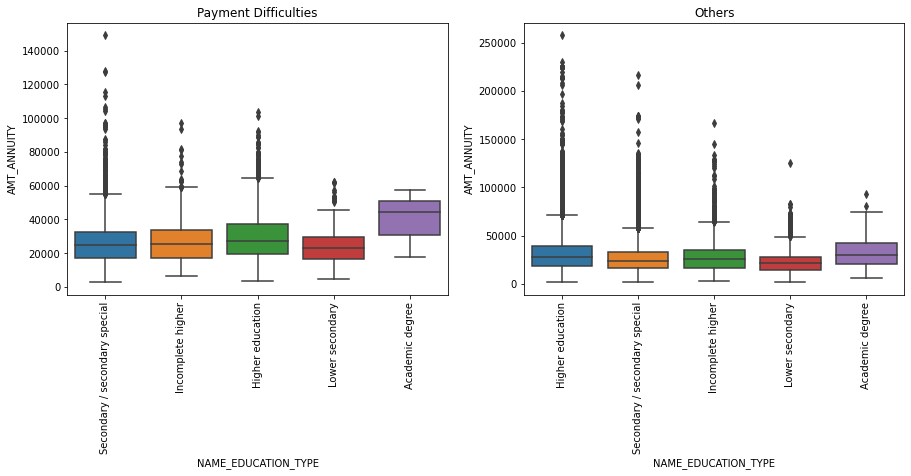

In [147]:
# Bivariate Analysis between NAME_EDUCATION_TYPE and AMT_ANNUITY of TARGET_1 and TARGET_0
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
sns.boxplot(data =TARGET_1,x= 'NAME_EDUCATION_TYPE', y='AMT_ANNUITY' )
plt.xticks(rotation=90)
plt.title('Payment Difficulties')

plt.subplot(1,2,2)
sns.boxplot(data =TARGET_0,x= 'NAME_EDUCATION_TYPE', y='AMT_ANNUITY' )
plt.xticks(rotation=90)
plt.title('Others')
plt.show()

In NAME_EDUCATION_TYPE Academic degree category has more defaulters and Higher education and Academic degree pays more AMT_ANNUITY.

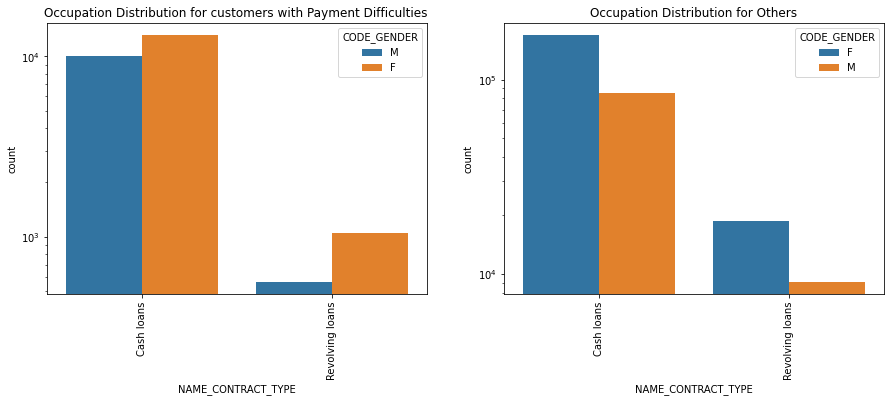

In [148]:
# Bivariate Analysis between NAME_CONTRACT_TYPE and CODE_GENDER of TARGET_1 and TARGET_0
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
sns.countplot(data=TARGET_1,x='NAME_CONTRACT_TYPE',order=TARGET_1['NAME_CONTRACT_TYPE'].value_counts().index, hue='CODE_GENDER')
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('Occupation Distribution for customers with Payment Difficulties ')

plt.subplot(1,2,2)
sns.countplot(data=TARGET_0,x='NAME_CONTRACT_TYPE',order=TARGET_0['NAME_CONTRACT_TYPE'].value_counts().index, hue='CODE_GENDER')
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('Occupation Distribution for Others')
plt.show()

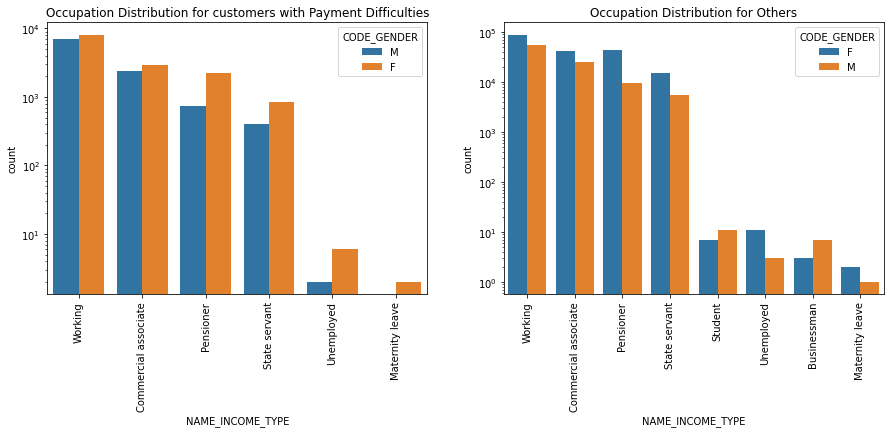

In [149]:
# Bivariate Analysis between NAME_INCOME_TYPE and CODE_GENDER of TARGET_1 and TARGET_0
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
sns.countplot(data=TARGET_1,x='NAME_INCOME_TYPE',order=TARGET_1['NAME_INCOME_TYPE'].value_counts().index, hue='CODE_GENDER')
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('Occupation Distribution for customers with Payment Difficulties')

plt.subplot(1,2,2)
sns.countplot(data=TARGET_0,x='NAME_INCOME_TYPE',order=TARGET_0['NAME_INCOME_TYPE'].value_counts().index, hue='CODE_GENDER')
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('Occupation Distribution for Others')
plt.show()

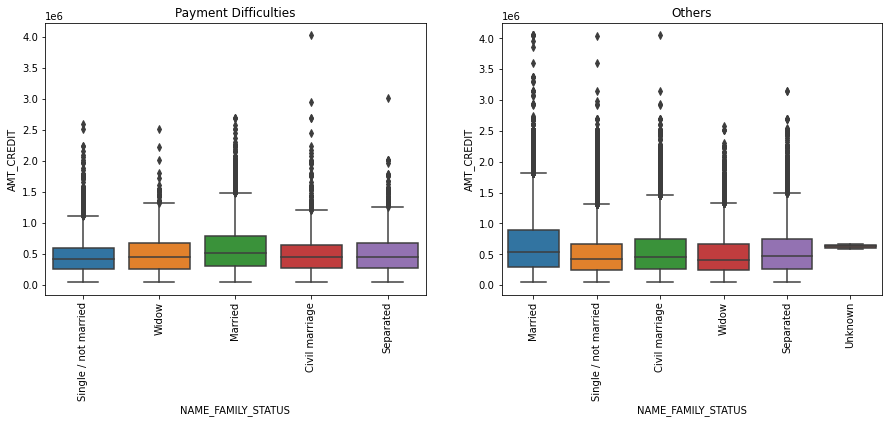

In [150]:
# Bivariate Analysis between NAME_FAMILY_STATUS and AMT_CREDIT of TARGET_1 and TARGET_0
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
sns.boxplot(data =TARGET_1,x= 'NAME_FAMILY_STATUS', y='AMT_CREDIT' )
plt.xticks(rotation=90)
plt.title('Payment Difficulties')

plt.subplot(1,2,2)
sns.boxplot(data =TARGET_0,x= 'NAME_FAMILY_STATUS', y='AMT_CREDIT' )
plt.xticks(rotation=90)
plt.title('Others')
plt.show()

In NAME_FAMILY_STATUS Married category applies more for loan.

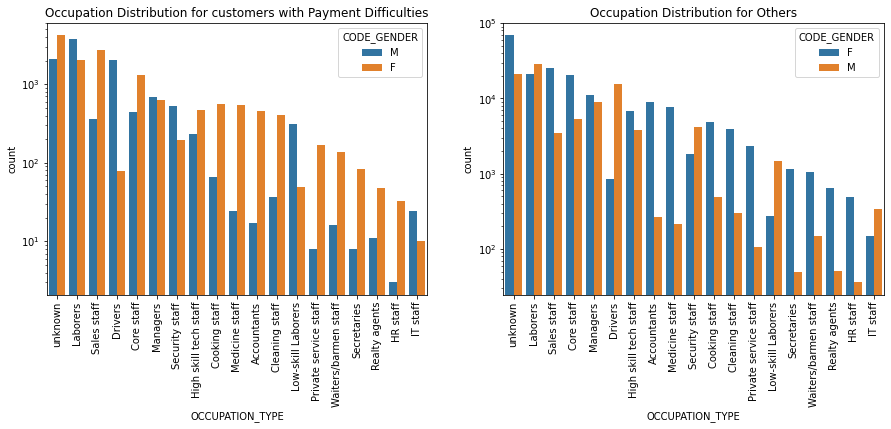

In [151]:
# Bivariate Analysis between OCCUPATION_TYPE and CODE_GENDER of TARGET_1 and TARGET_0
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
sns.countplot(data=TARGET_1,x='OCCUPATION_TYPE',order=TARGET_1['OCCUPATION_TYPE'].value_counts().index, hue='CODE_GENDER')
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('Occupation Distribution for customers with Payment Difficulties')

plt.subplot(1,2,2)
sns.countplot(data=TARGET_0,x='OCCUPATION_TYPE',order=TARGET_0['OCCUPATION_TYPE'].value_counts().index, hue='CODE_GENDER')
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('Occupation Distribution for Others')
plt.show()

OCCUPATION_TYPE female are more defaulters but also apply more for loans.

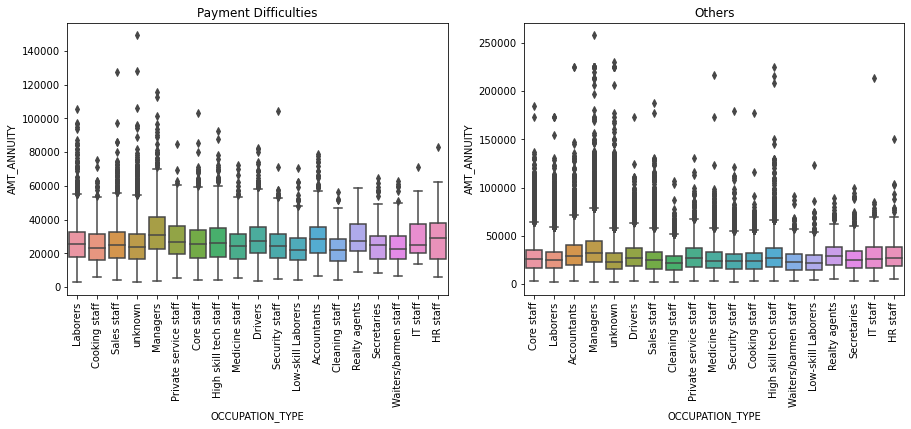

In [152]:
# Bivariate Analysis between OCCUPATION_TYPE and AMT_ANNUITY of TARGET_1 and TARGET_0
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
sns.boxplot(data =TARGET_1,x= 'OCCUPATION_TYPE', y='AMT_ANNUITY' )
plt.xticks(rotation=90)
plt.title('Payment Difficulties')

plt.subplot(1,2,2)
sns.boxplot(data =TARGET_0,x= 'OCCUPATION_TYPE', y='AMT_ANNUITY' )
plt.xticks(rotation=90)
plt.title('Others')
plt.show()

In OCCUPATION_TYPE Managers, High skill tech staff and Realty agents pays loan on time, Managers also face difficulties in loan repayments.

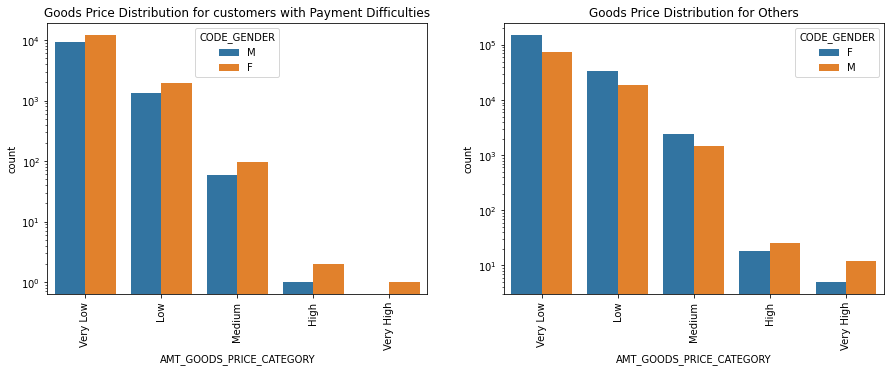

In [153]:
# Bivariate Analysis between AMT_GOODS_PRICE_CATEGORY and CODE_GENDER of TARGET_1 and TARGET_0
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
sns.countplot(data=TARGET_1,x='AMT_GOODS_PRICE_CATEGORY',order=TARGET_1['AMT_GOODS_PRICE_CATEGORY'].value_counts().index, hue='CODE_GENDER')
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('Goods Price Distribution for customers with Payment Difficulties')

plt.subplot(1,2,2)
sns.countplot(data=TARGET_0,x='AMT_GOODS_PRICE_CATEGORY',order=TARGET_0['AMT_GOODS_PRICE_CATEGORY'].value_counts().index, hue='CODE_GENDER')
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('Goods Price Distribution for Others')
plt.show()

#### Multivariate Analysis

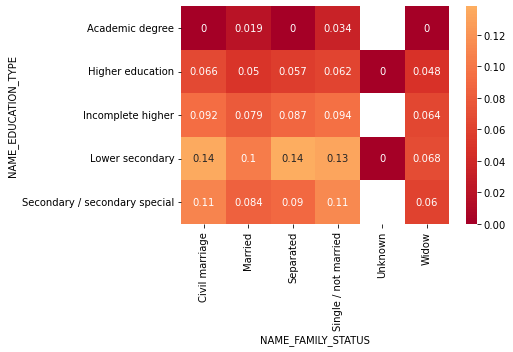

In [154]:
# Multivariate Analysis between NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS and TARGET
Multi_Res = pd.pivot_table(data= app_data,index='NAME_EDUCATION_TYPE', columns='NAME_FAMILY_STATUS', values='TARGET')
sns.heatmap(Multi_Res,annot=True,cmap='RdYlGn',center=0.2308)
plt.show()

NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS and TARGET having lower value i.e 0 or dark color face less difficulties in loan repaymant and getting loan.

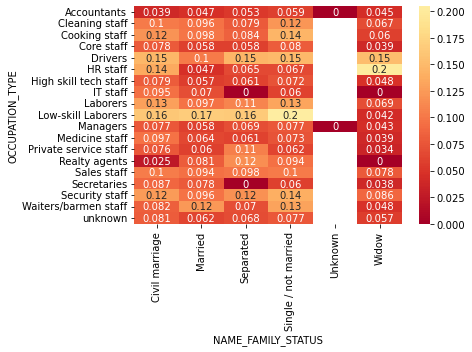

In [155]:
# Multivariate Analysis between OCCUPATION_TYPE,NAME_FAMILY_STATUS and TARGET
Multi_Res_1 = pd.pivot_table(data= app_data,index='OCCUPATION_TYPE', columns='NAME_FAMILY_STATUS', values='TARGET')
sns.heatmap(Multi_Res_1,annot=True,cmap='RdYlGn',center=0.2308)
plt.show()

OCCUPATION_TYPE,NAME_FAMILY_STATUS and TARGET having lower value i.e 0 or dark color face less difficulties in loan repaymant and getting loan.

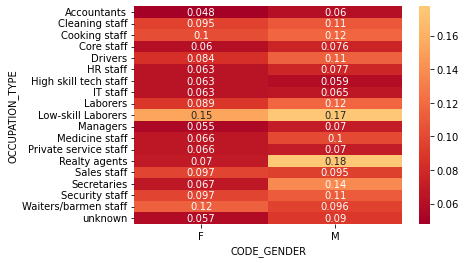

In [156]:
# Multivariate Analysis between OCCUPATION_TYPE,CODE_GENDER and TARGET
Multi_Res_3 = pd.pivot_table(data= app_data,index='OCCUPATION_TYPE', columns='CODE_GENDER', values='TARGET')
sns.heatmap(Multi_Res_3,annot=True,cmap='RdYlGn',center=0.2308)
plt.show()

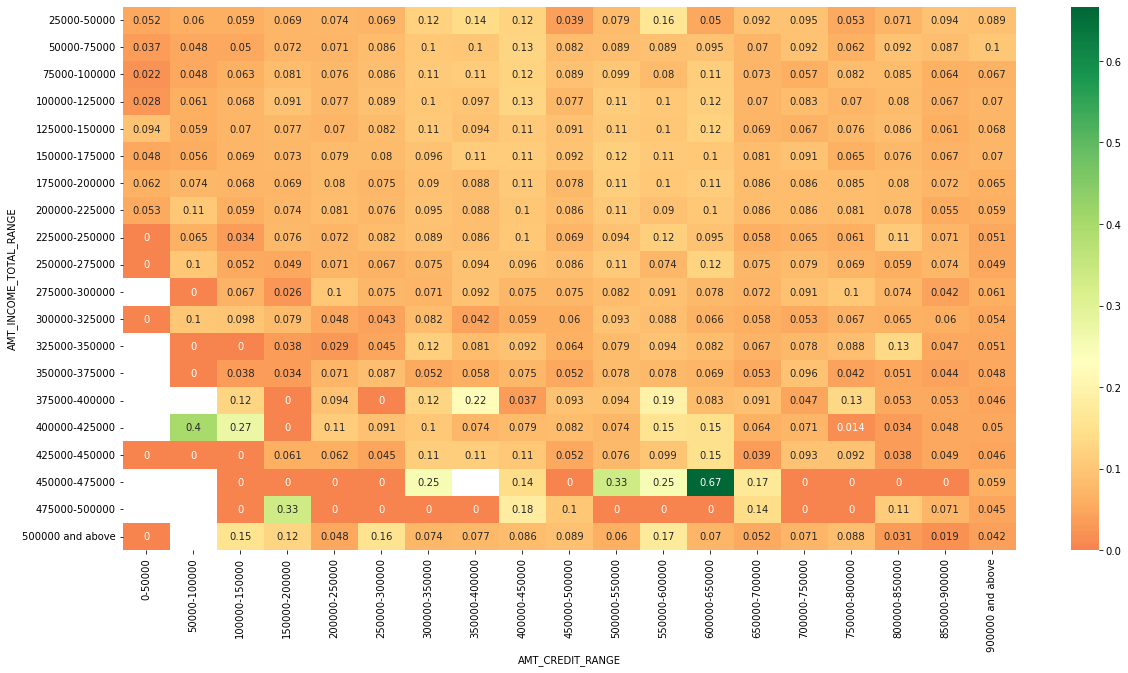

In [157]:
# Multivariate Analysis between OCCUPATION_TYPE,NAME_FAMILY_STATUS and TARGET
Multi_Res_2 = pd.pivot_table(data= app_data,index='AMT_INCOME_TOTAL_RANGE', columns='AMT_CREDIT_RANGE', values='TARGET')
plt.figure(figsize=[20,10])
sns.heatmap(Multi_Res_2,annot=True,cmap='RdYlGn',center=0.2308)
plt.show()

In [158]:
app_data.corr()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,-0.002108,-0.001129,-0.001820,-0.000343,-0.000433,-0.000232,0.000849,0.001500,0.001369,0.000973,0.000384,0.002804,-0.001337,-0.000415,0.002815,0.002753,0.000281,-0.002895,-0.001075,-0.001138,0.000350,-0.000283,0.001097,0.002903,-0.001885,-0.001582,0.000067,0.002342,0.000222,-0.001409,-0.000082,-0.001423,0.001187,0.000858,0.000700,-0.003411,-0.004139,-0.001097,0.002121,-0.002694,0.001809,0.001505,-0.000815,-0.002012,-0.001045,0.000896,-0.001077,0.002604,-0.000724,0.001450,0.000509,0.000167,0.001073,0.000282,-0.002672,-0.002193,0.002099,0.000485,0.001025,0.004659
TARGET,-0.002108,1.000000,0.019187,-0.003982,-0.030369,-0.012817,-0.039645,-0.037227,-0.078239,-0.047046,-0.041975,-0.051457,0.000534,0.045982,0.028524,0.000370,-0.023806,-0.001758,0.009308,0.058899,0.060893,-0.024166,0.005576,0.006942,0.002819,0.044395,0.050994,0.032518,-0.160472,-0.178919,0.009131,0.032248,0.009022,0.031276,-0.055218,0.005417,0.044346,-0.002672,-0.000316,-0.028602,-0.001520,-0.008040,-0.004352,-0.001414,-0.004229,-0.000756,-0.011583,-0.009464,-0.006536,-0.011615,-0.003378,-0.007952,-0.001358,0.000215,0.003709,0.000930,0.002704,0.000788,-0.012462,-0.002022,0.019930
CNT_CHILDREN,-0.001129,0.019187,1.000000,0.012882,0.002145,0.021374,-0.001827,-0.025573,-0.330938,-0.241583,-0.183395,0.028019,0.001041,0.240714,0.055630,-0.000794,-0.029906,0.022619,0.879161,0.025423,0.024781,-0.007292,-0.013319,0.008185,0.014835,0.020072,0.070650,0.069957,-0.018015,-0.042710,0.015593,-0.001262,0.015232,-0.001861,0.005865,0.001786,0.056837,-0.003709,-0.016737,-0.157024,-0.001498,0.051697,-0.001997,-0.002756,-0.005318,0.000293,0.003945,-0.005459,0.003609,0.010662,0.000773,0.004031,0.000864,0.000988,-0.002450,-0.000410,-0.000366,-0.002436,-0.010808,-0.007836,-0.041550
AMT_INCOME_TOTAL,-0.001820,-0.003982,0.012882,1.000000,0.156870,0.191657,0.159610,0.074796,-0.027261,-0.063835,-0.027805,-0.008506,0.000325,0.063994,-0.017193,-0.008290,0.000159,0.038378,0.016342,-0.085465,-0.091735,0.036459,0.031191,0.062340,0.058059,0.003574,0.006431,0.008285,0.060925,-0.030229,-0.013099,-0.013244,-0.013015,-0.013135,0.018585,-0.001000,-0.016751,0.000529,0.001507,-0.045878,0.003825,0.072451,0.018389,0.000290,0.002315,0.002540,0.022747,0.020708,0.010793,0.007269,0.002230,0.003130,0.002408,0.000242,-0.000589,0.000709,0.002944,0.002387,0.024700,0.004859,0.011690
AMT_CREDIT,-0.000343,-0.030369,0.002145,0.156870,1.000000,0.770138,0.986968,0.099738,0.055436,-0.064319,-0.009621,0.006575,0.001436,0.065519,-0.021085,0.023653,0.026213,0.016632,0.063160,-0.101776,-0.110915,0.052738,0.024010,0.051929,0.052609,-0.026886,-0.018856,0.000081,0.131228,0.043516,0.000190,-0.021229,0.000239,-0.023767,0.073701,0.008905,0.096365,0.000630,-0.011756,-0.046717,-0.004040,0.082819,0.022602,-0.003100,0.028986,0.003857,0.052429,0.048828,0.032252,0.061925,0.011743,0.034329,0.021082,0.03102

### Loading Data(previous application) 

In [159]:
# Loading previous_application.csv data
prev_app_data = pd.read_csv(r'F:\Credit EDA Case Study\previous_application.csv')
prev_app_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [160]:
# Checking Shape of dataframe
prev_app_data.shape

(1670214, 37)

### Data Handling and Cleaning

#### Checking Duplicates

In [161]:
#### Checking Duplicates
prev_app_data.duplicated().sum()

0

No Duplicates Found

#### Information About The Datatypes Of All Variables To Find Incorrect Datatypes Or Handling The Correct Datatypes
Data Types: Multiple types of data types are available in the dataset.

Example: Numerical Data (like int64 , float64 types) and Categorical (object types)
In Data given:

           Numerical Data: TARGET, CNT_CHILDREN, ETC
           Categorical Data: NAME_CONTRACT_TYPE, CODE_GENDER, ETC

In [162]:
# Checking the datatypes of all the variables in the dataframe
# prev_app_data.info(verbose=True)
# prev_app_data.dtypes
prev_app_data.info(-1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

#### Missing Values Treatment
From Lectures: Set values as missing values: identify values that indicate missing data. Ex: 'NA','XX','999',etc Adding is good, exaggerating is bad. Delete rows and columns Fill partial missing values.

Types of missing values: MCAR,MAR,MNAR

##### Missing Values

In [163]:
# checking the number of null values in the columns
prev_app_data.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [164]:
# checking the percentage of null values in the columns
null_percentage = 100*prev_app_data.isnull().sum()/len(prev_app_data)
round(null_percentage,2).sort_values()

SK_ID_PREV                      0.00
NAME_YIELD_GROUP                0.00
NAME_SELLER_INDUSTRY            0.00
SELLERPLACE_AREA                0.00
CHANNEL_TYPE                    0.00
NAME_PRODUCT_TYPE               0.00
NAME_PORTFOLIO                  0.00
NAME_GOODS_CATEGORY             0.00
NAME_CLIENT_TYPE                0.00
CODE_REJECT_REASON              0.00
DAYS_DECISION                   0.00
NAME_CONTRACT_STATUS            0.00
NAME_CASH_LOAN_PURPOSE          0.00
NAME_PAYMENT_TYPE               0.00
AMT_APPLICATION                 0.00
NFLAG_LAST_APPL_IN_DAY          0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
HOUR_APPR_PROCESS_START         0.00
WEEKDAY_APPR_PROCESS_START      0.00
AMT_CREDIT                      0.00
NAME_CONTRACT_TYPE              0.00
SK_ID_CURR                      0.00
PRODUCT_COMBINATION             0.02
AMT_ANNUITY                    22.29
CNT_PAYMENT                    22.29
AMT_GOODS_PRICE                23.08
DAYS_LAST_DUE                  40.30
D

In [165]:
# creating a dropping list of null values with percentage 40
prev_drop_temp= (100*prev_app_data.isnull().sum()/len(prev_app_data)).reset_index().rename(columns= {'index':'column_name',0:'% missing'})
prev_drop_columns = list(prev_drop_temp[prev_drop_temp['% missing']>=40]['column_name'])
prev_drop_columns

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [166]:
# finding the length of the drop_columns
len(prev_drop_columns)

11

##### Droping the Missing Values

In [167]:
# Droping the null values having percentage more than 40
prev_app_data = prev_app_data.drop(prev_drop_columns,axis=1)

In [168]:
# Checking the shape of dataframe again
prev_app_data.shape

(1670214, 26)

In [169]:
# Categorical variables in prev_app_data
prev_app_data.select_dtypes(include='object').columns

Index(['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY',
       'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [170]:
# Number of Categorical Variables in prev_app_data
len(prev_app_data.select_dtypes(include='object').columns)

15

In [171]:
# checking the percentage of null values again after dropping columns
100*prev_app_data.isnull().sum()/len(prev_app_data)

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT                    22.286366
NAME_YIELD_GROUP

#### Imputing Missing values
For Numerical column use: mean(), median()

For Categorical Column use: mode()


##### percentage of null values between 0 and 25

In [172]:
# percentage of null values between 25 and 0
null_values_between_25_and_0 = null_percentage[(null_percentage<=25)& (null_percentage>0)]
round(null_values_between_25_and_0,2)

AMT_ANNUITY            22.29
AMT_CREDIT              0.00
AMT_GOODS_PRICE        23.08
CNT_PAYMENT            22.29
PRODUCT_COMBINATION     0.02
dtype: float64

In [173]:
# Check the most common value in the AMT_ANNUITY column i.e mode
prev_app_data['AMT_ANNUITY'].value_counts()

2250.000     31865
11250.000    13974
6750.000     13442
9000.000     12496
22500.000    11903
             ...  
3794.445         1
8723.160         1
27948.330        1
25374.285        1
14704.290        1
Name: AMT_ANNUITY, Length: 357959, dtype: int64

In [174]:
# Check the quantitative spread of the AMT_ANNUITY column gives mean and median
prev_app_data['AMT_ANNUITY'].describe()

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

AMT_ANNUITY is a numerical type so the null values in it should be replace with mean or median.

In [175]:
# Check the most common value in the AMT_CREDIT column i.e. mode
prev_app_data['AMT_CREDIT'].value_counts()

0.00         336768
45000.00      35051
225000.00     21094
450000.00     19954
135000.00     18720
              ...  
262768.50         1
354213.00         1
438817.50         1
253111.50         1
436370.22         1
Name: AMT_CREDIT, Length: 86803, dtype: int64

In [176]:
# Check the quantitative spread of the AMT_CREDIT column gives mean and median
prev_app_data['AMT_CREDIT'].describe()

count    1.670213e+06
mean     1.961140e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64

AMT_CREDIT is a numerical type so the null values in it should be replace with mean or median.

In [177]:
# Check the most common value in the AMT_GOODS_PRICE column i.e. mode
prev_app_data['AMT_GOODS_PRICE'].value_counts()

45000.00     47831
225000.00    43549
135000.00    40666
450000.00    38926
90000.00     29367
             ...  
185292.00        1
225054.00        1
156212.55        1
99896.31         1
267295.50        1
Name: AMT_GOODS_PRICE, Length: 93885, dtype: int64

In [178]:
# Check the quantitative spread of the AMT_GOODS_PRICE column gives mean and median
prev_app_data['AMT_GOODS_PRICE'].describe()

count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64

AMT_GOODS_PRICE is a numerical type so the null values in it should be replace with mean or median.

In [179]:
# Check the most common value in the CNT_PAYMENT column i.e. mode
prev_app_data['CNT_PAYMENT'].value_counts()

12.0    323049
6.0     190461
0.0     144985
10.0    141851
24.0    137764
18.0     77430
36.0     72583
60.0     53600
48.0     47316
8.0      30349
4.0      26924
30.0     16924
14.0      8253
42.0      7136
16.0      5710
5.0       3957
54.0      2104
20.0      1805
7.0       1434
9.0       1236
3.0       1100
15.0       904
11.0       669
72.0       139
13.0        51
17.0        48
84.0        45
22.0        37
23.0        27
26.0        13
35.0        11
66.0        10
28.0         8
29.0         8
32.0         6
19.0         6
34.0         4
59.0         4
41.0         3
47.0         3
45.0         3
21.0         3
44.0         2
39.0         2
46.0         2
38.0         2
33.0         1
40.0         1
53.0         1
Name: CNT_PAYMENT, dtype: int64

In [180]:
# Check the quantitative spread of the CNT_PAYMENT column gives mean and median
prev_app_data['CNT_PAYMENT'].describe()

count    1.297984e+06
mean     1.605408e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64

CNT_PAYMENT is a numerical type so the null values in it should be replace with mean or median.

In [181]:
# Check the most common value in the PRODUCT_COMBINATION column i.e mode
prev_app_data['PRODUCT_COMBINATION'].value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

In [182]:
# Check the quantitative spread of the PRODUCT_COMBINATION column gives mean and median
prev_app_data['PRODUCT_COMBINATION'].describe()

count     1669868
unique         17
top          Cash
freq       285990
Name: PRODUCT_COMBINATION, dtype: object

PRODUCT_COMBINATION is a Categorical type so the null values in it should be replace with mode.
Here mode is Cash

In [183]:
# Dataframe descripton
prev_app_data.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,1.284699e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.297984e+06
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,2.278473e+05,1.248418e+01,9.964675e-01,-8.806797e+02,3.139511e+02,1.605408e+01
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,3.153966e+05,3.334028e+00,5.932963e-02,7.790997e+02,7.127443e+03,1.456729e+01
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.922000e+03,-1.000000e+00,0.000000e+00
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,5.084100e+04,1.000000e+01,1.000000e+00,-1.300000e+03,-1.000000e+00,6.000000e+00
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.123200e+05,1.200000e+01,1.000000e+00,-5.810000e+02,3.000000e+00,1.200000e+01
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,2.340000e+05,1.500000e+01,1.000000e+00,-2.800000e+02,8.200000e+01,2.400000e+01
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,6.905160e+06,2.300000e+01,1.000000e+00,-1.000000e+00,4.000000e+06,8.400000e+01


##### Handling Negative Values

In [184]:
# Dealing with the negative Sign
prev_app_data['DAYS_DECISION']= abs(prev_app_data['DAYS_DECISION'])
prev_app_data['SELLERPLACE_AREA']= abs(prev_app_data['SELLERPLACE_AREA'])

In [185]:
# Checking the dataframe describe
prev_app_data.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,1.284699e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.297984e+06
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,2.278473e+05,1.248418e+01,9.964675e-01,8.806797e+02,3.148644e+02,1.605408e+01
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,3.153966e+05,3.334028e+00,5.932963e-02,7.790997e+02,7.127403e+03,1.456729e+01
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,5.084100e+04,1.000000e+01,1.000000e+00,2.800000e+02,1.000000e+00,6.000000e+00
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.123200e+05,1.200000e+01,1.000000e+00,5.810000e+02,3.000000e+00,1.200000e+01
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,2.340000e+05,1.500000e+01,1.000000e+00,1.300000e+03,8.200000e+01,2.400000e+01
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,6.905160e+06,2.300000e+01,1.000000e+00,2.922000e+03,4.000000e+06,8.400000e+01


#### Handling Outliers

In [186]:
# Upper bound = 75th Percentile value+1.5*IQR
# Lower bound = 25th Percentile value-1.5*IQR

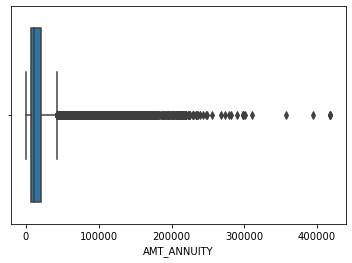

In [187]:
# Boxplot for AMT_ANNUITY
sns.boxplot(prev_app_data.AMT_ANNUITY)
plt.show()

AMT_ANNUITY in prev_app_data has outliers

In [188]:
# Describe AMT_ANNUITY
prev_app_data.AMT_ANNUITY.describe()

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

In [189]:
# Values above Upper and below Lower bounds are outliers
prev_upper_bound_AMT_ANNUITY=2.065842e+04+1.5*(2.065842e+04-6.321780e+03)
prev_lower_bound_AMT_ANNUITY=6.321780e+03-1.5*(2.065842e+04-6.321780e+03)
print(prev_upper_bound_AMT_ANNUITY)
print(prev_lower_bound_AMT_ANNUITY)

42163.38
-15183.18


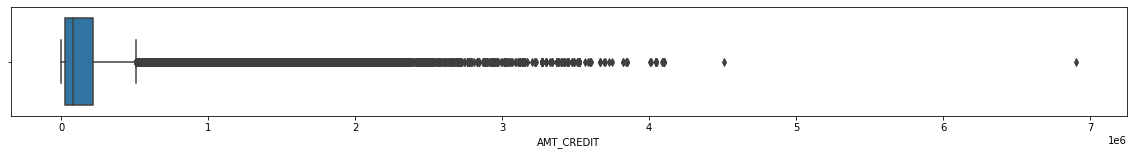

In [190]:
# Boxplot for AMT_CREDIT
plt.figure(figsize=(20,2))
sns.boxplot(prev_app_data.AMT_CREDIT)
plt.show()

AMT_CREDIT in prev_app_data has outliers

In [191]:
# Describe AMT_CREDIT
prev_app_data.AMT_CREDIT.describe()

count    1.670213e+06
mean     1.961140e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64

In [192]:
# Values above Upper and below Lower bounds are outliers
prev_upper_bound_AMT_CREDIT=2.164185e+05+1.5*(2.164185e+05-2.416050e+04)
prev_lower_bound_AMT_CREDIT=2.416050e+043-1.5*(2.164185e+05-2.416050e+04)
print(prev_upper_bound_AMT_CREDIT)
print(prev_lower_bound_AMT_CREDIT)

504805.5
2.41605e+43


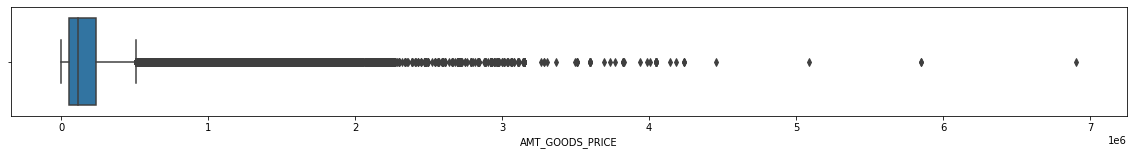

In [193]:
# Boxplot for AMT_GOODS_PRICE
plt.figure(figsize=(20,2))
sns.boxplot(prev_app_data.AMT_GOODS_PRICE)
plt.show()

AMT_GOODS_PRICE in prev_app_data has outliers

In [194]:
# Describe AMT_GOODS_PRICE
prev_app_data.AMT_GOODS_PRICE.describe()

count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [195]:
# Values above Upper and below Lower bounds are outliers
prev_upper_bound_AMT_GOODS_PRICE=2.340000e+05+1.5*(2.340000e+05-5.084100e+04)
prev_lower_bound_AMT_GOODS_PRICE=5.084100e+04-1.5*(2.340000e+05-5.084100e+04)
print(prev_upper_bound_AMT_GOODS_PRICE)
print(prev_lower_bound_AMT_GOODS_PRICE)

508738.5
-223897.5


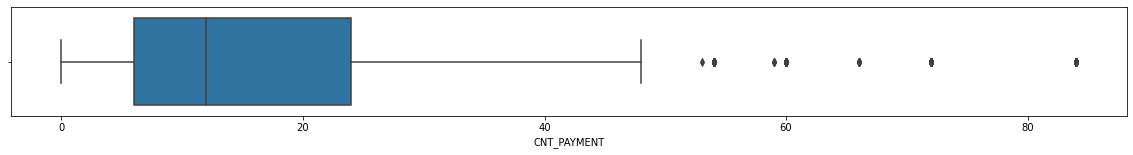

In [196]:
# Boxplot for CNT_PAYMENT
plt.figure(figsize=(20,2))
sns.boxplot(prev_app_data.CNT_PAYMENT)
plt.show()

CNT_PAYMENT in prev_app_data has outliers

In [197]:
# Describe CNT_PAYMENT
prev_app_data.CNT_PAYMENT.describe()

count    1.297984e+06
mean     1.605408e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64

In [198]:
# Values above Upper and below Lower bounds are outliers
prev_upper_bound_CNT_PAYMENT=2.400000e+01+1.5*(2.400000e+01-6.000000e+00)
prev_lower_bound_CNT_PAYMENT=6.000000e+00-1.5*(2.400000e+01-6.000000e+00)
print(prev_upper_bound_CNT_PAYMENT)
print(prev_lower_bound_CNT_PAYMENT)

51.0
-21.0


In [199]:
# Value count of PRODUCT_COMBINATION
prev_app_data.PRODUCT_COMBINATION.value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

In [200]:
# Describe PRODUCT_COMBINATION
prev_app_data.PRODUCT_COMBINATION.describe()

count     1669868
unique         17
top          Cash
freq       285990
Name: PRODUCT_COMBINATION, dtype: object

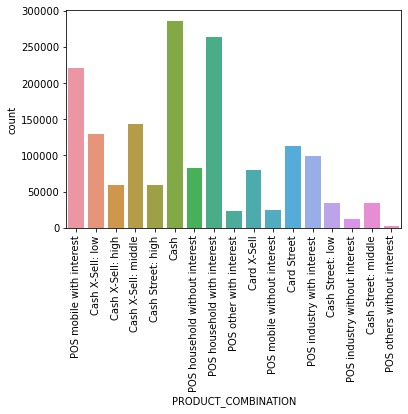

In [201]:
# Count Plot for PRODUCT_COMBINATION
sns.countplot(data=prev_app_data,x= 'PRODUCT_COMBINATION')
plt.xticks(rotation=90)
plt.show()

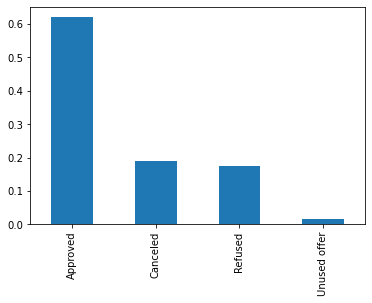

In [202]:
# NAME_CONTRACT_STATUS Application status count  
(prev_app_data.NAME_CONTRACT_STATUS.value_counts()/len(prev_app_data)).plot.bar()
plt.show()

Approved Applications are more in count

### Merging the dataframes

In [203]:
new_data = pd.merge(app_data,prev_app_data,on='SK_ID_CURR',how='inner')
new_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT_RANGE,AMT_INCOME_TOTAL_RANGE,AMT_GOODS_PRICE_CATEGORY,YEAR_BIRTH,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25.920548,1.745205,9.994521,5.808219,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,3.106849,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,400000-450000,200000-225000,Very Low,15-30,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45.931507,3.254795,3.249315,0.797260,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,2.268493,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,900000 and above,250000-275000,Low,45-60,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12,Y,1,XNA,Approved,746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,1,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45.931507,3.254795,3.249315,0.797260,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,2.268493,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,900000 and above,250000-275000,Low,45-60,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17,Y,1,XAP,Approved,828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45.931507,3.254795,3.249315,0.797260,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,2.268493,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0

In [204]:
# Checking Shape of new_data
new_data.shape

(1413701, 102)

In [205]:
#Data types information
new_data.info('all')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 102 columns):
 #    Column                        Dtype   
---   ------                        -----   
 0    SK_ID_CURR                    int64   
 1    TARGET                        int64   
 2    NAME_CONTRACT_TYPE_x          object  
 3    CODE_GENDER                   object  
 4    FLAG_OWN_CAR                  object  
 5    FLAG_OWN_REALTY               object  
 6    CNT_CHILDREN                  int64   
 7    AMT_INCOME_TOTAL              float64 
 8    AMT_CREDIT_x                  float64 
 9    AMT_ANNUITY_x                 float64 
 10   AMT_GOODS_PRICE_x             float64 
 11   NAME_TYPE_SUITE               object  
 12   NAME_INCOME_TYPE              object  
 13   NAME_EDUCATION_TYPE           object  
 14   NAME_FAMILY_STATUS            object  
 15   NAME_HOUSING_TYPE             object  
 16   REGION_POPULATION_RELATIVE    float64 
 17   DAYS_BIRTH               

In [206]:
# Data describe
new_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,HOUR_APPR_PROCESS_START_y,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
count,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413608e+06,1.412493e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1413701.0,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.411880e+06,1.171859e+06,1.410555e+06,1.410555e+06,1.410555e+06,1.410555e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.250074e+06,1.250074e+06,1.250074e+06,1.250074e+06,1.250074e+06,1.250074e+06,1.413701e+06,1.106483e+06,1.413701e+06,1.413700e+06,1.094176e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.106488e+06
mean,2.784813e+05,8.655296e-02,4.048933e-01,1.733160e+05,5.875537e+05,2.701702e+04,5.277186e+05,2.074985e-02,4.471521e+01,1.990780e+02,1.370749e+01,8.313872e+00,1.0,8.064393e-01,1.822585e-01,9.992452e-01,2.828752e-01,7.242904e-02,2.150501e+00,2.059638e+00,2.037603e+00,1.198433e+01,1.207327e-02,4.396686e-02,3.604793e-02,7.360538e-02,2.221481e-01,1.740601e-01,5.114275e-01,4.896986e-01,1.544176e+00,1.540436e-01,1.526303e+00,1.080426e-01,2.971783e+00,7.073632e-05,7.385600e-01,7.639522e-05,1.369597e-02,8.942273e-02,2.129163e-04,7.442521e-02,3.182427e-03,5.588169e-05,1.702623e-03,1.414726e-06,1.783970e-03,1.428874e-03,6.571404e-04,6.006221e-03,1.421800e-04,4.196078e-03,3.989528e-04,3.671215e-04,2.242341e-04,6.202833e-03,6.817196e-03,3.856572e-02,3.013734e-01,3.615394e-01,2.912612e+00,1.922744e+06,1.583718e+04,1.752436e+05,1.963541e+05,2.264512e+05,1.247893e+01,9.964321e-01,8.803670e+02,3.158884e+02,1.605194e+01
std,1.028118e+05,2.811789e-01,7.173454e-01,1.985734e+05,3.849173e+05,1.395116e+04,3.532465e+05,1.334702e-02,1.190290e+01,3.927051e+02,9.728907e+00,4.129798e+00,0.0,3.950887e-01,3.860576e-01,2.746247e-02,4.503965e-01,2.591971e-01,9.006787e-01,4.957797e-01,4.886431e-01,3.232181e+00,1.092132e-01,2.050215e-01,1.864095e-01,2.611277e-01,4.156903e-01,3.791613e-01,1.911188e-01,1.965360e-01,2.530715e+00,4.658973e-01,2.508953e+00,3.790588e-01,2.191608e+00,8.410194e-03,4.394192e-01,8.740105e-03,1.162256e-01,2.853530e-01,1.459010e-02,2.624617e-01,5.632319e-02,7.475199e-03,4.122773e-02,1.189422e-03,4.219939e-02,3.777344e-02,2.562633e-02,7.726675e-02,1.192308e-02,6.464112e-02,1.996983e-02,1.915690e-02,1.497278e-02,8.188486e-02,1.065273e-01,2.136566e-01,9.802897e-01,9.257137e-01,2.199798e+00,5.327153e+05,1.472491e+04,2.936222e+05,3.194813e+05,3.15937

In [207]:
# Dividing the new_data into four categories
approved_data= new_data[new_data['NAME_CONTRACT_STATUS']=='Approved']
canceled_data= new_data[new_data['NAME_CONTRACT_STATUS']=='Canceled']
refused_data= new_data[new_data['NAME_CONTRACT_STATUS']=='Refused']
unused_data= new_data[new_data['NAME_CONTRACT_STATUS']=='Unused offer']

In [208]:
approved_data.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT_RANGE,AMT_INCOME_TOTAL_RANGE,AMT_GOODS_PRICE_CATEGORY,YEAR_BIRTH,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25.920548,1.745205,9.994521,5.808219,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,3.106849,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,400000-450000,200000-225000,Very Low,15-30,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45.931507,3.254795,3.249315,0.797260,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,2.268493,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,900000 and above,250000-275000,Low,45-60,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12,Y,1,XNA,Approved,746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,1,XNA,12.0,low_normal,Cash X-Sell: low


In [209]:
canceled_data.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT_RANGE,AMT_INCOME_TOTAL_RANGE,AMT_GOODS_PRICE_CATEGORY,YEAR_BIRTH,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
6,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52.068493,8.326027,26.939726,6.676712,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,1.690411,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,300000-350000,125000-150000,Very Low,45-60,2827850,Revolving loans,NaN,0.0,0.0,NaN,THURSDAY,15,Y,1,XAP,Canceled,181,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,1,XNA,NaN,XNA,Card Street
10,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52.068493,8.326027,26.939726,6.676712,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,1.690411,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,300000-350000,125000-150000,Very Low,45-60,1243599,Cash loans,NaN,0.0,0.0,NaN,THURSDAY,15,Y,1,XNA,Canceled,181,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,1,XNA,NaN,XNA,Cash


In [210]:
refused_data.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT_RANGE,AMT_INCOME_TOTAL_RANGE,AMT_GOODS_PRICE_CATEGORY,YEAR_BIRTH,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
13,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52.068493,8.326027,26.939726,6.676712,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,1.690411,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,300000-350000,125000-150000,Very Low,45-60,1697039,Cash loans,32696.1,688500.0,906615.0,688500.0,THURSDAY,15,Y,1,XNA,Refused,181,Cash through the bank,LIMIT,Repeater,XNA,Cash,x-sell,Credit and cash offices,1,XNA,48.0,low_normal,Cash X-Sell: low
33,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,913500.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.018634,55.065753,1000.665753,20.347945,9.627397,1,0,0,1,0,0,unknown,2.0,2,2,WEDNESDAY,14,0,0,0,0,0,0,np.NaN,0.205747,0.751724,1.0,0.0,1.0,0.0,0.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,900000 and above,100000-125000,Low,45-60,2668005,Cash loans,NaN,0.0,0.0,0.0,WEDNESDAY,9,Y,1,XNA,Refused,1162,Cash through the bank,LIMIT,Repeater,XNA,XNA,XNA,Credit and cash offices,1,XNA,NaN,XNA,Cash


In [211]:
unused_data.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT_RANGE,AMT_INCOME_TOTAL_RANGE,AMT_GOODS_PRICE_CATEGORY,YEAR_BIRTH,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
222,100061,0,Cash loans,F,N,Y,2,225000.0,314055.0,16164.0,238500.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.006629,28.693151,3.813699,5.547945,3.397260,1,1,0,1,0,0,Core staff,4.0,2,2,THURSDAY,3,0,0,0,1,1,0,Self-employed,0.702979,0.701696,0.0,0.0,0.0,0.0,1.561644,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0,300000-350000,200000-225000,Very Low,15-30,2474381,Consumer loans,NaN,66501.00,66501.00,66501.00,MONDAY,11,Y,1,XAP,Unused offer,1067,XNA,CLIENT,Repeater,Mobile,XNA,XNA,Stone,87,Connectivity,NaN,XNA,POS mobile with interest
358,100086,0,Cash loans,F,N,Y,1,135000.0,675000.0,21775.5,675000.0,Unaccompanied,Commercial associate,Higher education,Widow,House / apartment,0.019101,39.079452,6.827397,11.854795,12.375342,1,1,0,1,0,0,Laborers,2.0,2,2,THURSDAY,12,0,0,0,0,0,0,Self-employed,0.569873,0.198620,0.0,0.0,0.0,0.0,4.375342,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,4.0,2.0,650000-700000,125000-150000,Very Low,30-45,2235967,Consumer loans,NaN,76072.95,76072.95,76072.95,SATURDAY,12,Y,1,XAP,Unused offer,572,Cash through the bank,CLIENT,Repeater,Photo / Cinema Equipment,XNA,XNA,Country-wide,37,Connectivity,NaN,XNA,POS mobile with interest


#### Analysing Merged Data(new_data)

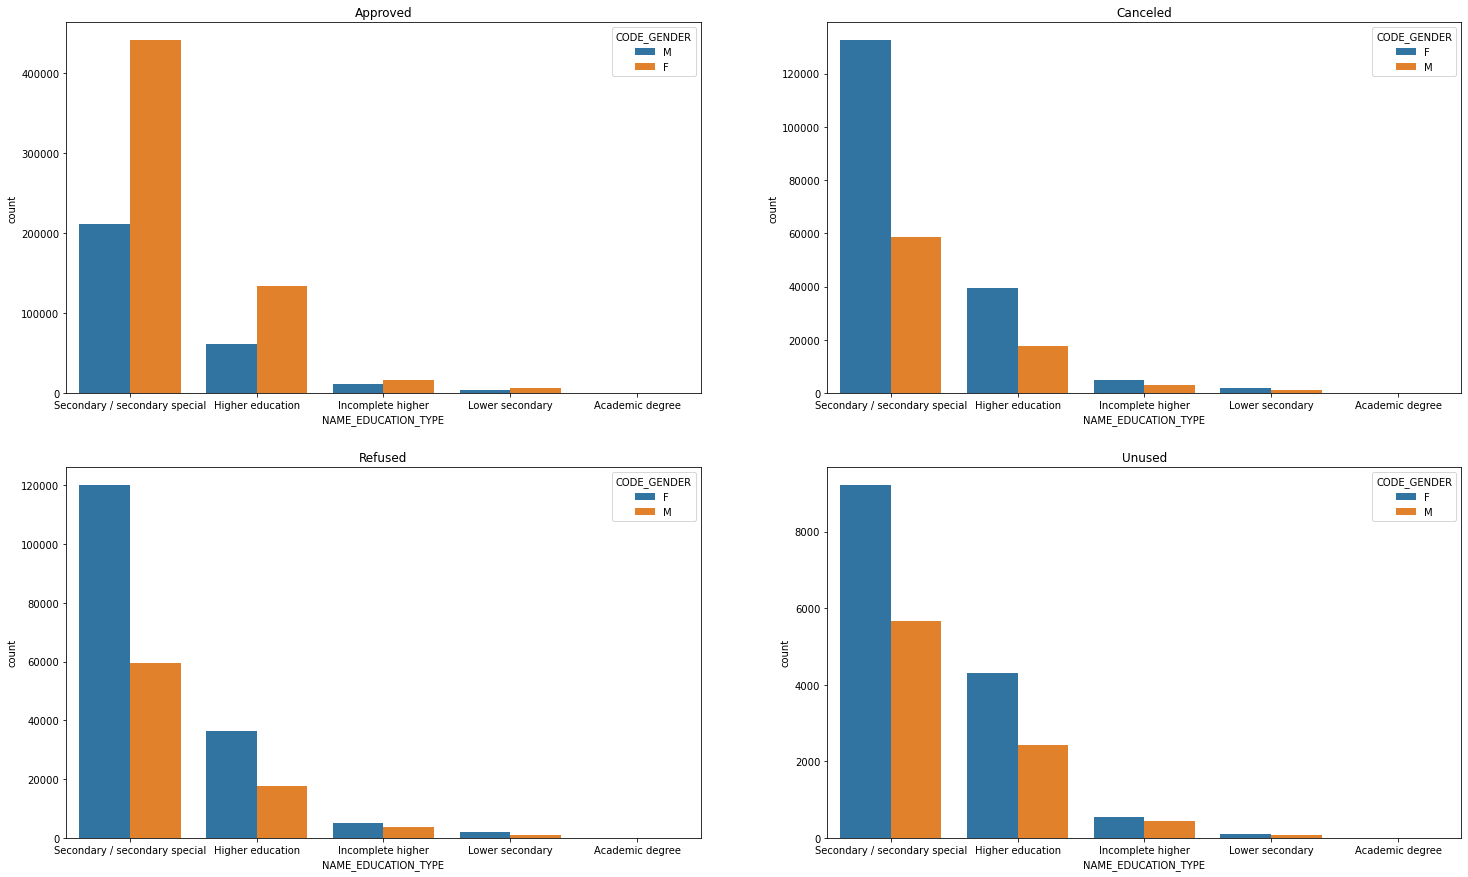

In [212]:
# Bivariate Analysis between NAME_EDUCATION_TYPE and CODE_GENDER of approved_data, canceled_data and TARGET_0
plt.figure(figsize=[25,15])
plt.subplot(2,2,1)
sns.countplot(data=approved_data,x='NAME_EDUCATION_TYPE',order=approved_data['NAME_EDUCATION_TYPE'].value_counts().index, hue='CODE_GENDER')
plt.xticks(rotation=0)
plt.title('Approved')

#plt.figure(figsize=[10,5])
plt.subplot(2,2,2)
sns.countplot(data=canceled_data,x='NAME_EDUCATION_TYPE',order=canceled_data['NAME_EDUCATION_TYPE'].value_counts().index, hue='CODE_GENDER')
plt.xticks(rotation=0)
plt.title('Canceled')

#plt.figure(figsize=[10,5])
plt.subplot(2,2,3)
sns.countplot(data=refused_data,x='NAME_EDUCATION_TYPE',order=refused_data['NAME_EDUCATION_TYPE'].value_counts().index, hue='CODE_GENDER')
plt.xticks(rotation=0)
plt.title('Refused')

#plt.figure(figsize=[10,5])
plt.subplot(2,2,4)
sns.countplot(data=unused_data,x='NAME_EDUCATION_TYPE',order=unused_data['NAME_EDUCATION_TYPE'].value_counts().index, hue='CODE_GENDER')
plt.xticks(rotation=0)
plt.title('Unused')
plt.show()

Approved loans for Female having secondary/secondary special education type

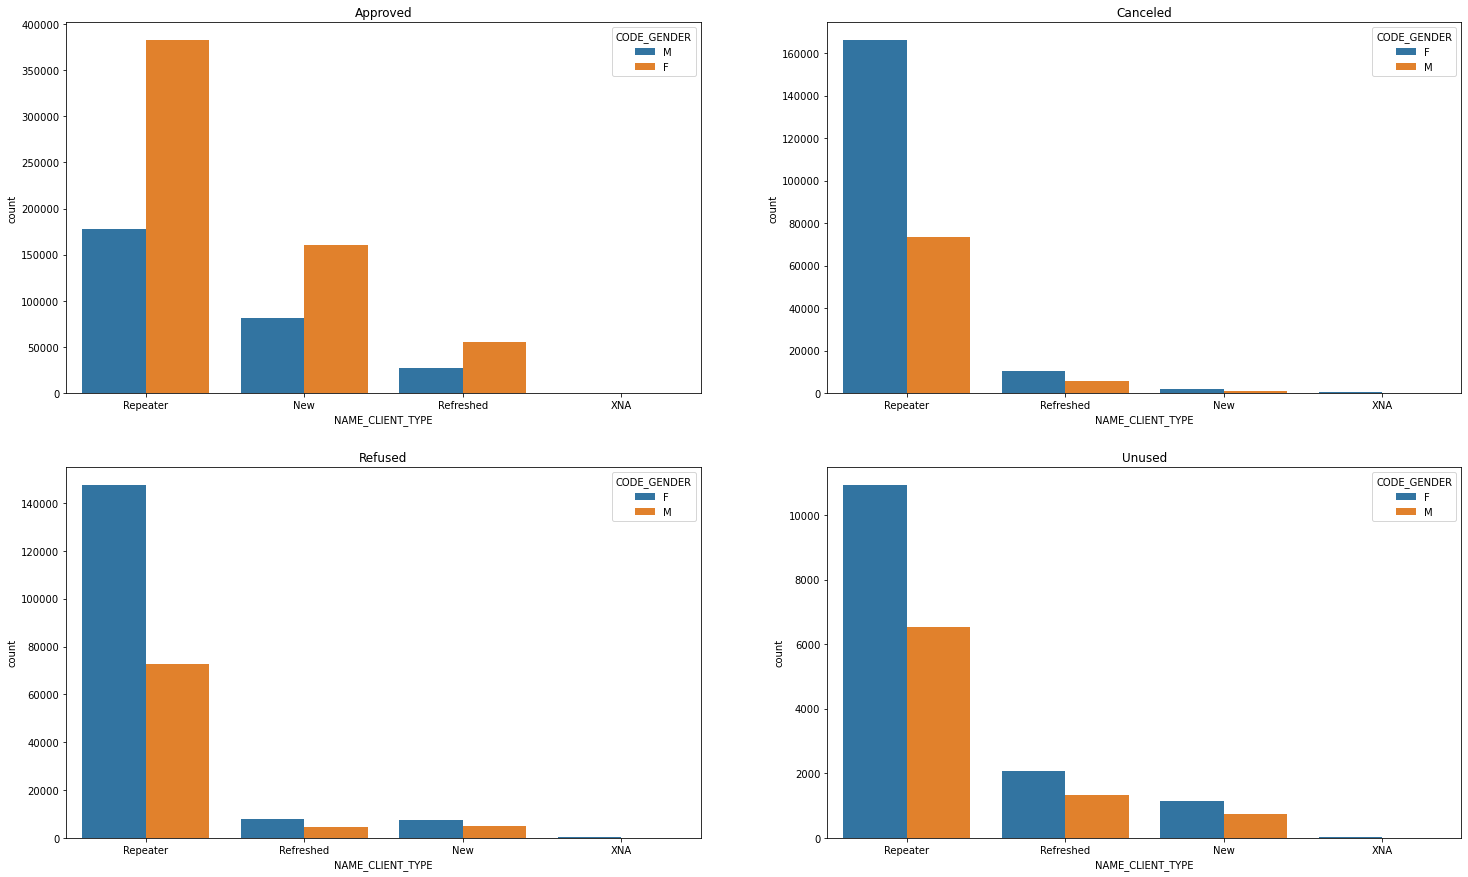

In [213]:
# Bivariate Analysis between NAME_CLIENT_TYPE and CODE_GENDER of approved_data, canceled_data and TARGET_0
plt.figure(figsize=[25,15])
plt.subplot(2,2,1)
sns.countplot(data=approved_data,x='NAME_CLIENT_TYPE',order=approved_data['NAME_CLIENT_TYPE'].value_counts().index, hue='CODE_GENDER')
plt.xticks(rotation=0)
plt.title('Approved')

#plt.figure(figsize=[10,5])
plt.subplot(2,2,2)
sns.countplot(data=canceled_data,x='NAME_CLIENT_TYPE',order=canceled_data['NAME_CLIENT_TYPE'].value_counts().index, hue='CODE_GENDER')
plt.xticks(rotation=0)
plt.title('Canceled')

#plt.figure(figsize=[10,5])
plt.subplot(2,2,3)
sns.countplot(data=refused_data,x='NAME_CLIENT_TYPE',order=refused_data['NAME_CLIENT_TYPE'].value_counts().index, hue='CODE_GENDER')
plt.xticks(rotation=0)
plt.title('Refused')

#plt.figure(figsize=[10,5])
plt.subplot(2,2,4)
sns.countplot(data=unused_data,x='NAME_CLIENT_TYPE',order=unused_data['NAME_CLIENT_TYPE'].value_counts().index, hue='CODE_GENDER')
plt.xticks(rotation=0)
plt.title('Unused')
plt.show()

In NAME_CLIENT_TYPE Female Repeater, New, Refreshed Client loans are approved more.